# Physics of Data
### Spring 2023 
## Advanced Statistics for Physics Analysis
### Final Project
<br>

<h1><center> P02 - Naive Bayes classifier for Fake News recognition</center></h1>

### Roben Bhatti - 2091187
### Michail Sapkas - 2072109

<h1><center>Theoretical Background</center></h1>

The idea of Bayesian inference has been known since the work of Bayes (1763), and was first applied to text classification by Mosteller and Wallace (1964).

The multinomial naive Bayes classifier, so called because it is a Bayesian classifier that makes a simplifying (naive) assumption about how the features interact.

The intuition of the classifier is shown in Fig. 1. 

We represent a text document as if it were a **bag of words**, that is, an unordered set of words with their position ignored, keeping only their frequency in the document. In the example in the figure, instead of representing the word order in all the phrases like “I love this movie” and “I would recommend it”, we simply note that the word ***I*** occurred 5 times in the entire excerpt, the word ***it*** 6 times, the words ***love***, ***recommend***, and ***movie*** once, and so on.

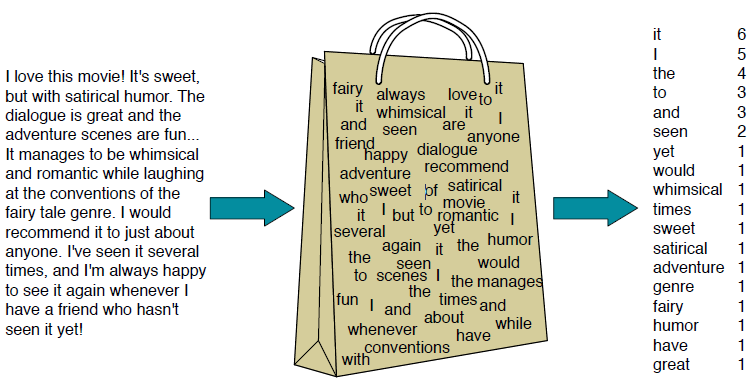

<center>Fig. 1</center>

Naive Bayes is a probabilistic classifier, meaning that for a document $d$, out of all classes $c\in C$ the classifier returns the class $\hat{c}$ which has the maximum posterior probability given the document. We use the hat notation **ˆ** to mean “our estimate of the correct class”.

$$ \hat{c} = \underset{c\in C}{argmax} P(c|d) $$

Bayes’ rule gives us a way to break down any conditional probability $P(x|y)$ into three other probabilities:

$$ P(x|y) = \frac{P(y|x)P(x)}{P(y)}$$

Therefore:

$$ \hat{c} = \underset{c\in C}{argmax} P(c|d) = \frac{P(d|c)P(c)}{P(d)} $$

We can conveniently simplify the equation above by dropping the denominator P(d). This is possible because P(d) doesn’t change for each class. We are always asking about the most likely class for the same document d, which must have the same probability P(d). Thus, we can choose the class that maximizes this simpler formula:

$$ \hat{c} = \underset{c\in C}{argmax} P(c|d) = \underset{c\in C}{argmax}P(d|c)P(c) $$

We compute the most probable class $\hat{c}$ given some document $d$ by choosing the class which has the highest product of two probabilities: the **prior** probability of prior the class $P(c)$| and the **likelihood** of the document $P(d|c)$:

$$ \hat{c} = \underset{c\in C}{argmax} \underbrace{P(d|c)}_{likelihood} \hspace{0.2cm} \underbrace{P(c)}_{prior} $$

Without loss of generalization, we can represent a document $d$ as a set of features $f_1,f_2,\cdots,f_n$:

$$ \hat{c} = \underset{c\in C}{argmax} \underbrace{P(f_1,f_2,\cdots,f_n|c)}_{likelihood} \hspace{0.2cm} \underbrace{P(c)}_{prior} $$

### Assumptions

1. The first is the bag-of-words assumption discussed intuitively above: we assume position doesn’t matter, and that the word “love” has the same effect on classification whether it occurs as the 1st, 20th, or last word in the document.

2. The second is commonly called the **naive Bayes assumption**: this is the conditional independence assumption that the probabilities $P(f|c)$ are independent given the class c and hence can be ‘naively’ multiplied as follows:

$$ P(f_1,f_2,\cdots,f_n|c) = P(f_1|c)\cdot P(f_2|c)\cdot _\cdots \cdot P(f_n|c) $$

### Finally
To apply the naive Bayes classifier to text, we need to learn the probability $P(f_i|c)$. We’ll assume a feature is just the existence of a word
in the document’s bag of words, and so we’ll want $P(w_i|c)$, and simply walk through every word $w$ in the document:

$$ c_{NB} = \underset{c\in C}{argmax} P(c)\prod_{words} P(w_i|c) $$

Naive Bayes calculations, like calculations for language modeling, are done in log space, to avoid underflow and increase speed. Thus Eq. 4.9 is generally instead expressed as:

$$ c_{NB} = \underset{c\in C}{argmax} \log{P(c)} + \sum_{words} \log{P(w_i|c)} $$

### Training the Naive Bayes Classifier
How can we learn the probabilities $P(c)$ and $P(w_i|c)$? Let’s first consider the maximum likelihood estimate. We’ll simply use the frequencies in the data. For the class **prior** $P(c)$ we ask what percentage of the documents in our training set are in each class $c$. Let $N_c$ be the number of documents in our training data with class $c$ and $N_{tot}$ be the total number of documents. Then:

$$ \hat{P}(c)=\frac{N_c}{N_{tot}} $$

We compute $P(w_i|c)$ as the fraction of times the word wi appears among all words in all documents of topic $c$. 

**We first concatenate all documents with category $c$ into one big “category c” text. Then we use the frequency of $w_i$ in this concatenated document to give a maximum likelihood estimate of the probability**:


$$ \hat{P}(w_i|c) = \frac{count(w_i,c)}{\sum count(w,c)} $$

What do we do about words that occur in our test data but are not in our vocabulary at all because they did not occur in any training document in any class? The solution for such unknown words is to ignore them remove them from the test document and not include any probability for them at all.

## Laplace smoothing

Since naive Bayes naively multiplies all the feature likelihoods together, zero probabilities in the likelihood term for any class will cause the probability of the class to be zero, no matter the other evidence! The simplest solution is the add-one (Laplace) smoothing. While Laplace smoothing is usually replaced by more sophisticated smoothing it is commonly used in naive Bayes text categorization:

$$ \hat{P}(w_i|c) = \frac{count(w_i,c) + 1}{\sum (count(w,c) + 1)} $$

## A pseudocode outline of the Naive Bayes Classifier

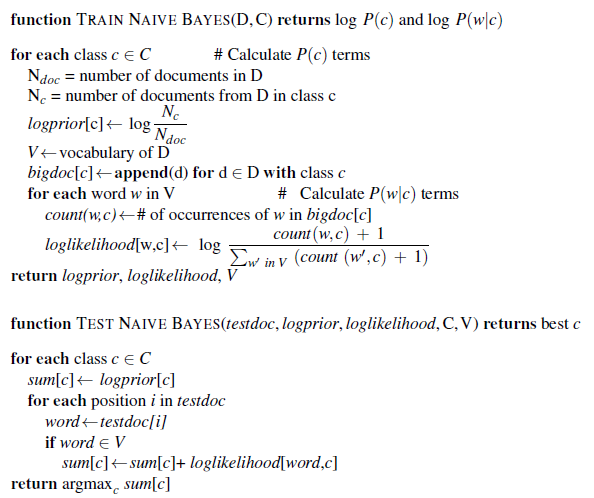

<h1><center>Code</center></h1>

## Preliminaries and Dataset

We are going to use the **text mining (tm)** library that handles preprocessing of text. 

In [1]:
library(tm)
library(tidyverse)
library(ggplot2)
library(dplyr)

ERROR: Error in library(tm): there is no package called ‘tm’


The dataset consists of **10238** sentences which are labeled as:

    0. Barely-True
    1. False
    2. Half-True
    3. Mostly-True
    4. Not-Known
    5. True

In [ ]:
#Load the dataset
dataset_1 <- read_csv('dataset1/train.csv')
#Omit NAN rows
dataset_1 <- na.omit(dataset_1)

We are conveniently changing the Labels from 0-5 to 1-6 to work with R loops over indexes.

In [3]:
dataset_1$Labels <- dataset_1$Labels+1

The dataset is split 80% into a train set and 20% into a test set

In [4]:
#To calculate the 80% of the dataset (ceiling rounds to the upper limit)
N_train <- ceiling(0.8*nrow(dataset_1))

#Create train and test set
train_set <- dataset_1[1:N_train,1:2]
test_set  <- dataset_1[N_train:nrow(dataset_1),1:2]

#Print the actual legnths of the train and test sets
cat("Length of the train set:",nrow(train_set))
cat("\n")
cat("Length of the test set:",nrow(test_set))

Length of the train set: 8191
Length of the test set: 2048

## Plot the cardinality of Train and Test sets

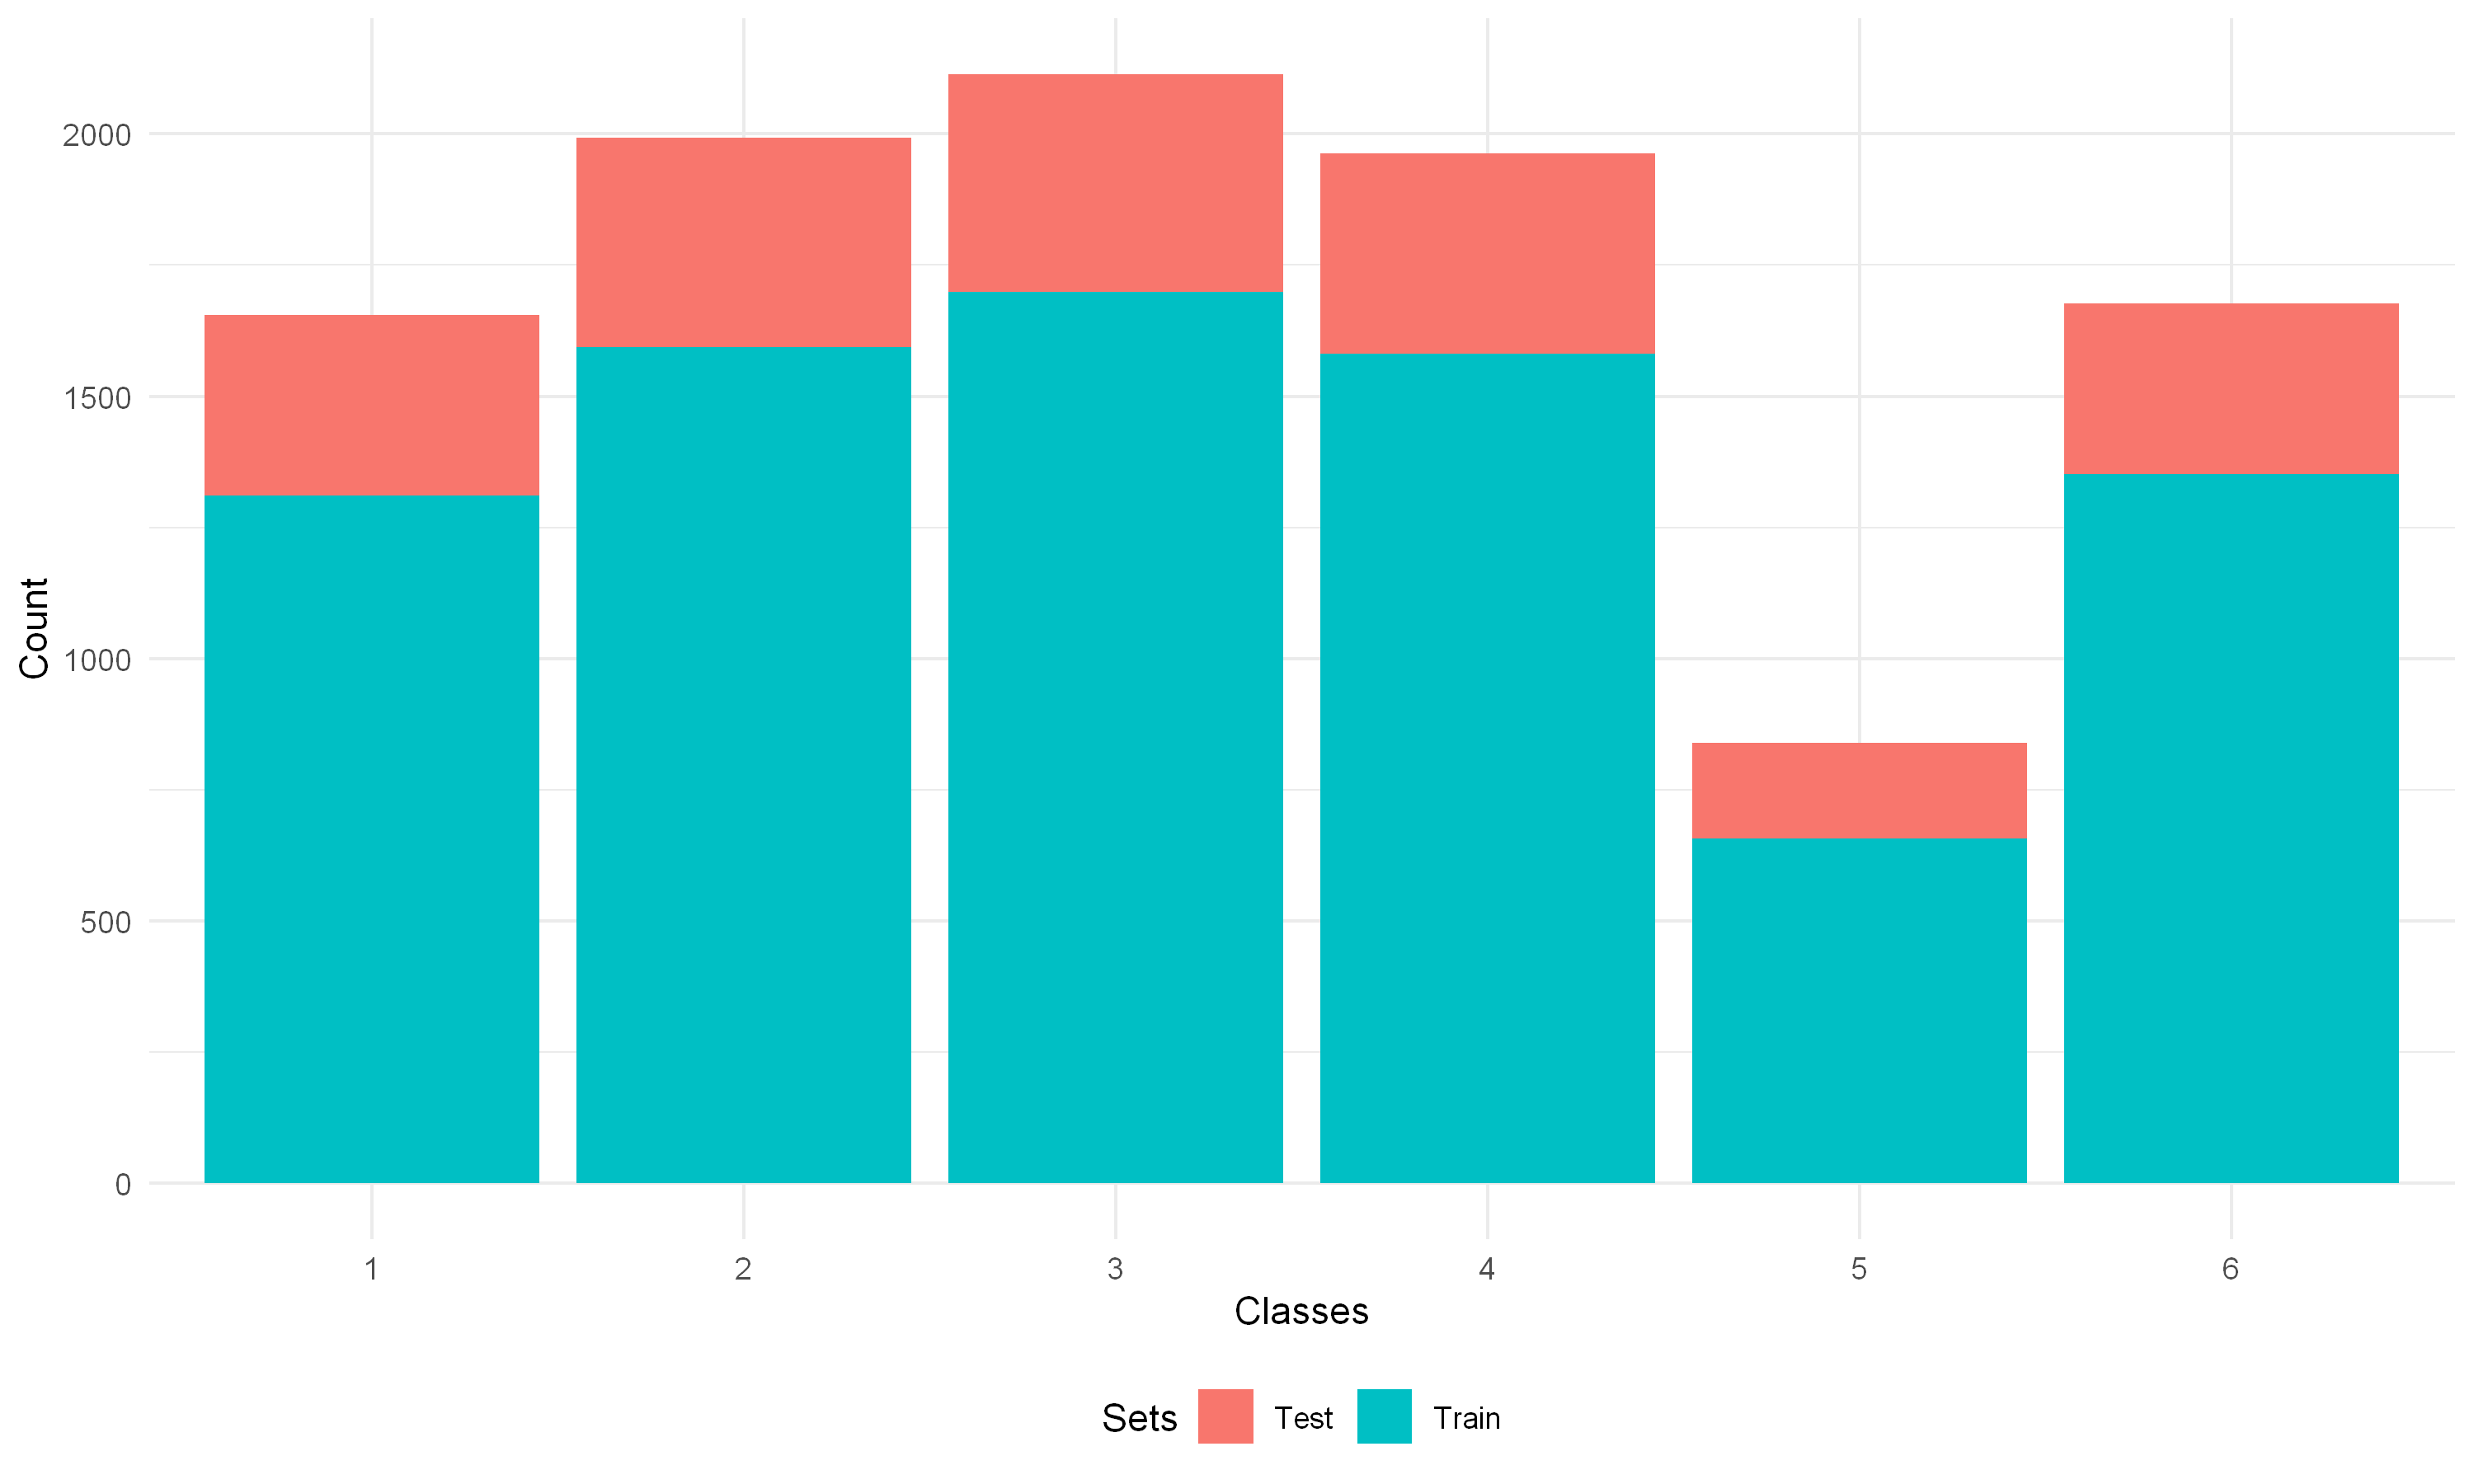

In [5]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res=300)

class_freqs <- train_set[1] %>% table() %>% data.frame
class_counts_test_set <- test_set[1] %>% table() %>% data.frame
class_freqs <- cbind(class_freqs,class_counts_test_set$Freq)
names(class_freqs) <- c("Classes","Train","Test")
data <- class_freqs %>% gather(key = "Sets", value = "Value", -Classes)

ggplot(data, aes(x = Value, y = Classes, fill = Sets)) +
  geom_bar(stat = "identity") +
  labs(x = "Count", y = "Classes") +
  theme_minimal() +
  theme(legend.position = "bottom") +
  coord_flip()

## Text Preprocessing
It is wise to not directly use the text of the dataset, therefore we are going to preprocess the words contained into the sentences with the following order:

    1. Remove any numeric values contained into the sentence.
    2. Remove special characters like %, &, *, etc.
    3. Convert all remaining text into lower case character.
    4. Apply "stemming" by reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas".
    5. Split the sentence into its remaining constituents.
    6. Delete all empty spaces that made it into the splitting.
    7. Remove all single characters.
    8. Remove commonly used words in the English language called "stop words".

In [6]:
# function that removes stopwords
rm_stopwords <- function(text, stopw = stopwords('en')){
    return(text[!(text %in% stopw)])
}

# function that processes the text
pre_process <- function(column, voc = FALSE,keep_features=1){
    s <- column                    %>%
        # remove digits
        gsub("\\d+","",.)          %>%
        # remove special characters
        gsub("[^[:alnum:]]"," ",.) %>%
        # lowercase
        tolower()                  %>%
        #stemming
        stemDocument(language = "english") %>%
        # split into bag of words
        strsplit(" ")              %>%
        # vector format
        unlist()
    
    # deleting remaining "" form previous steps  
    s <- s[s!=""]
    
    # removing single characters
    s <- s[!s %in% letters]

    #removing stepwords
    s <- rm_stopwords(s)
    
    frequency <- table(s)
    frequency <- sort(frequency,decreasing=T)

    N <- length(frequency)

    idx<-ceiling(keep_features*N)

    frequency<-frequency[1:idx]

    s <- as.character(rep(data.frame(frequency)$s,data.frame(frequency)$Freq))
    
    # creating vocabulary
    if(voc){
        return(unique(s))}
    else
        return(s)
}

### A preprocessing example from the dataset

Lets pick a sentence from the dataset and perform the preprocessing task to understand the process. We choose the 15th sentece of the training set:

In [7]:
dataset_1[15,]

Labels,Text,Text_Tag
<dbl>,<chr>,<chr>
1,Most of the (Affordable Care Act) has already in some sense been waived or otherwise suspended.,health-care


The preprocessing task converts the above sentence into a group of unique tokens.

In [8]:
pre_process(dataset_1[15,2])

[1] "act"      "afford"   "alreadi"  "care"     "otherwis" "sens"     "suspend" 
[8] "waiv"

## Frequency of processed words in the classes
Given that we calculated the frequencies of the words in the classes, we can represent them as wordclouds:

In [9]:
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: RColorBrewer



## Class 1 - False

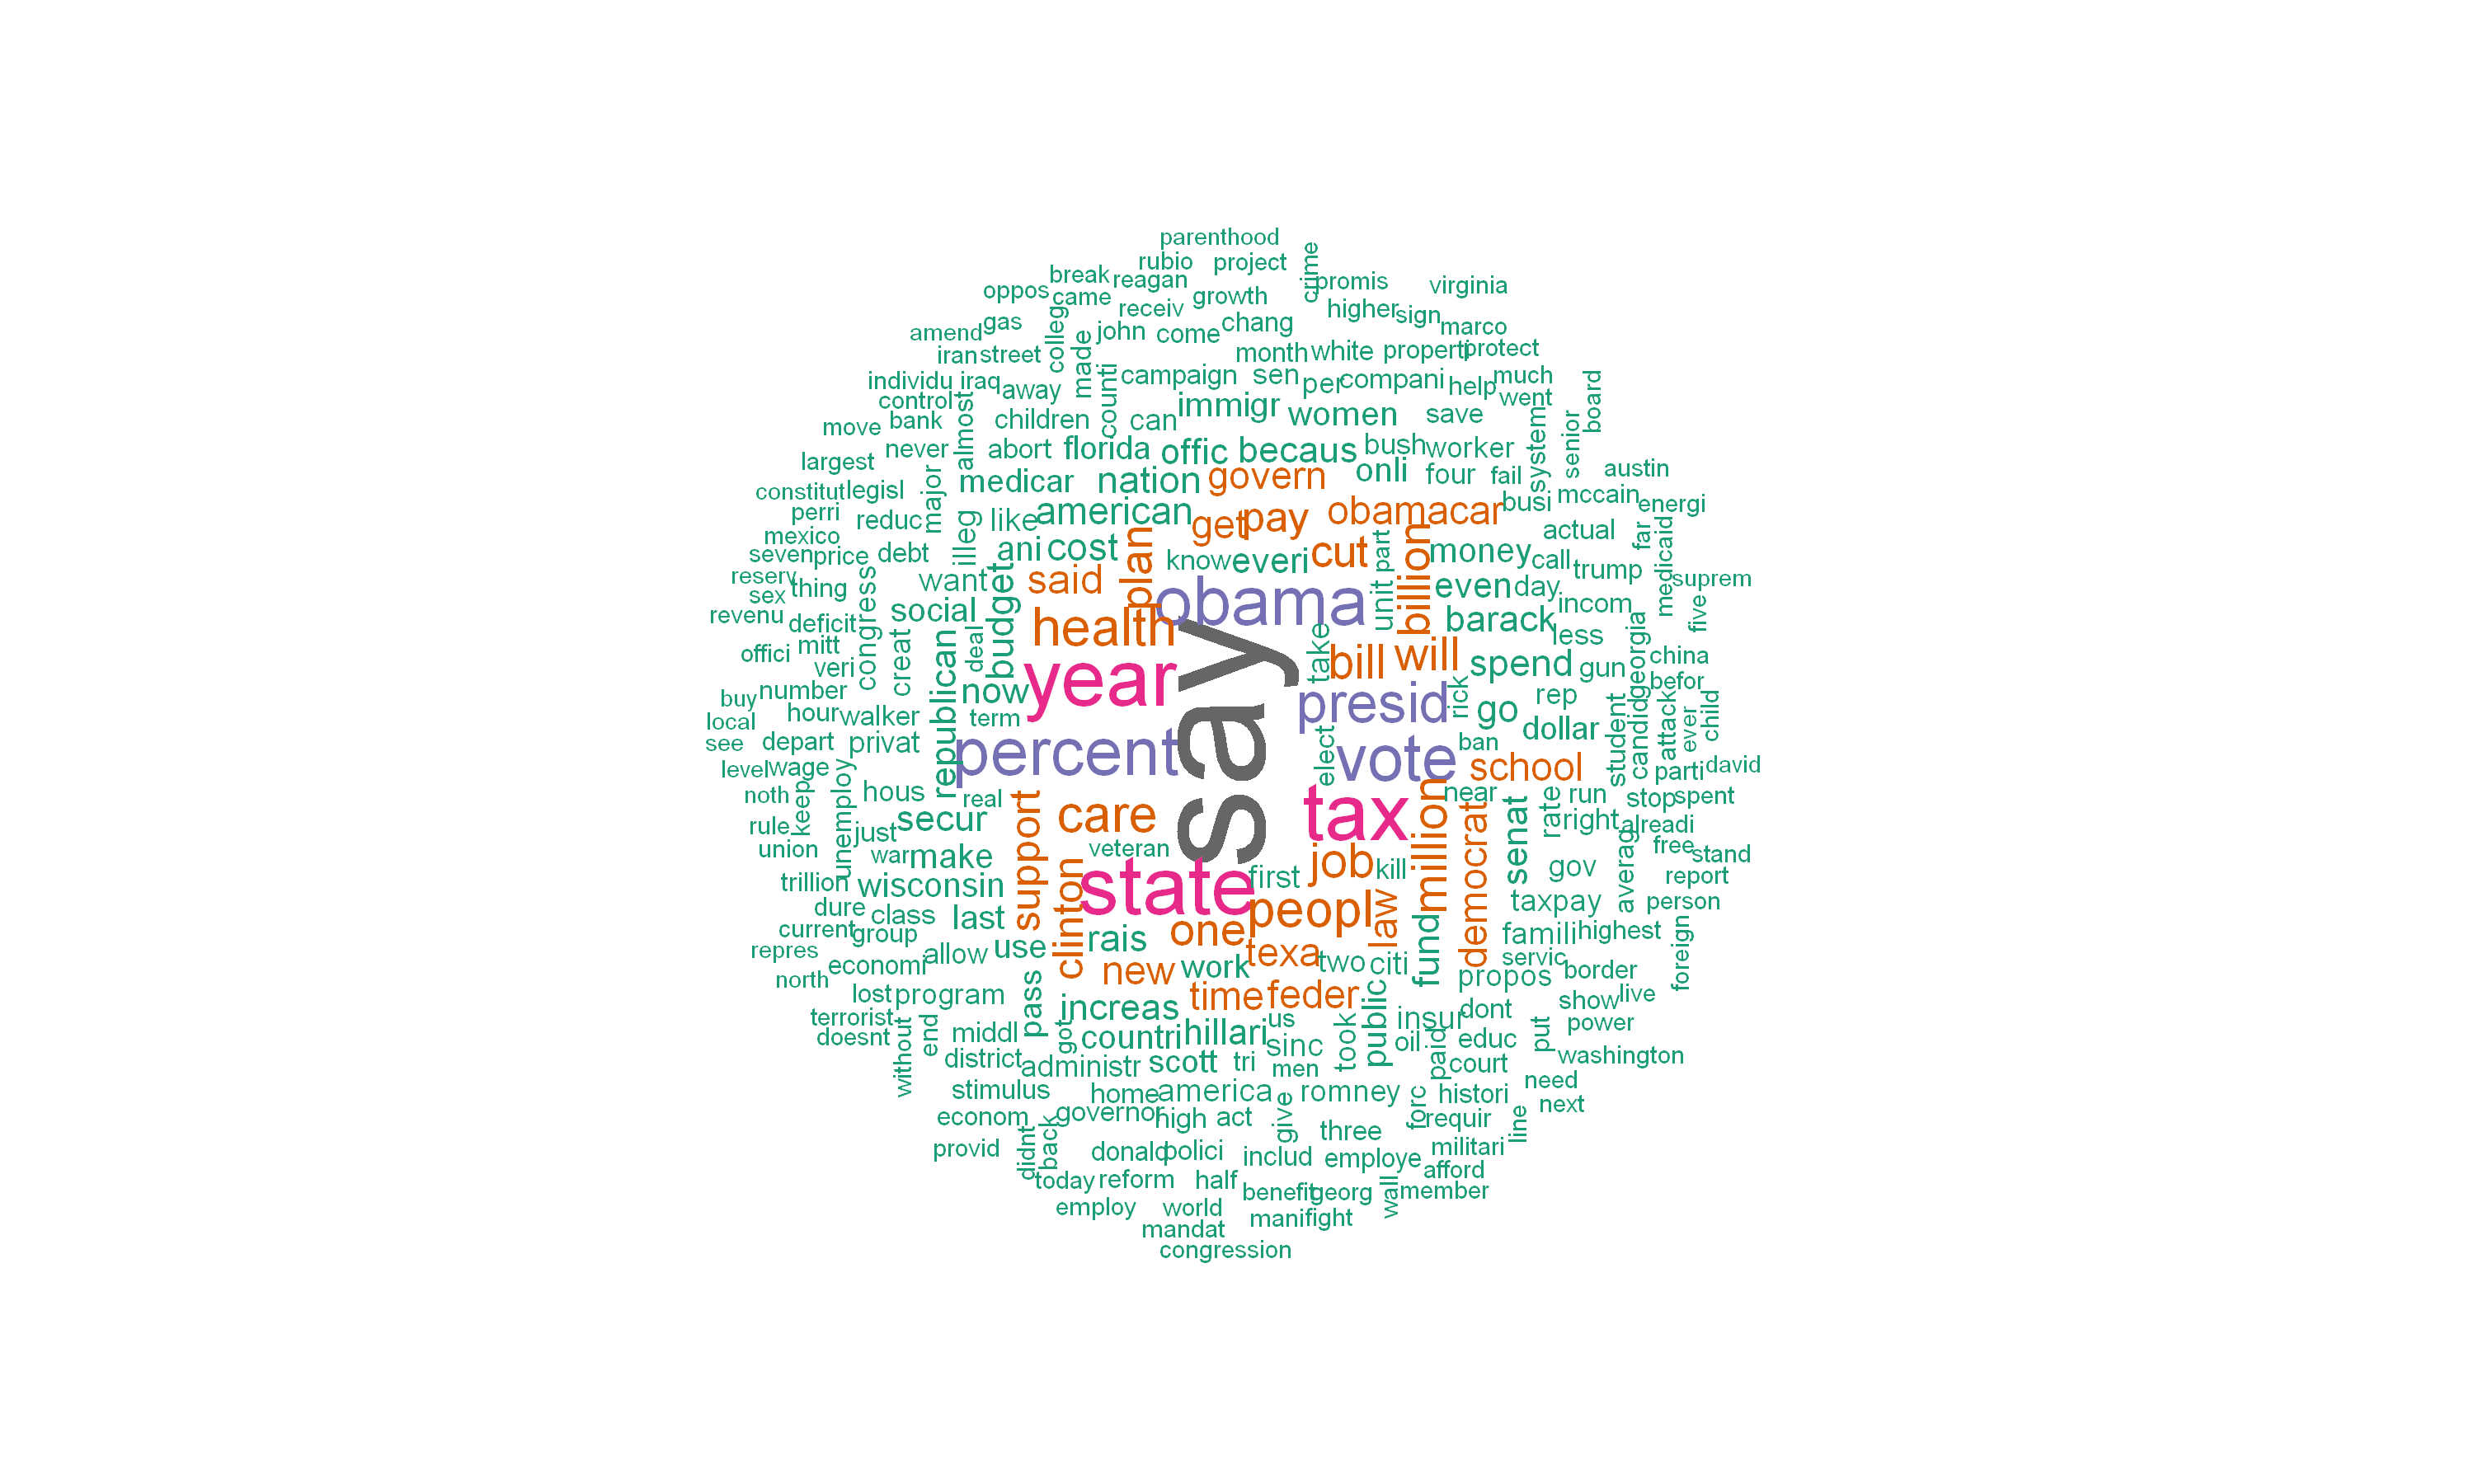

In [10]:
word_freqs <- dataset_1 %>% filter(Labels == 1) %>% pull(Text) %>% pre_process() %>% table() %>% data.frame

wordcloud(words = word_freqs$., freq = word_freqs$Freq, min.freq = 1,
          max.words=300, random.order=FALSE, rot.per=0.2, 
          colors=brewer.pal(8, "Dark2"))

## Class 5 - True

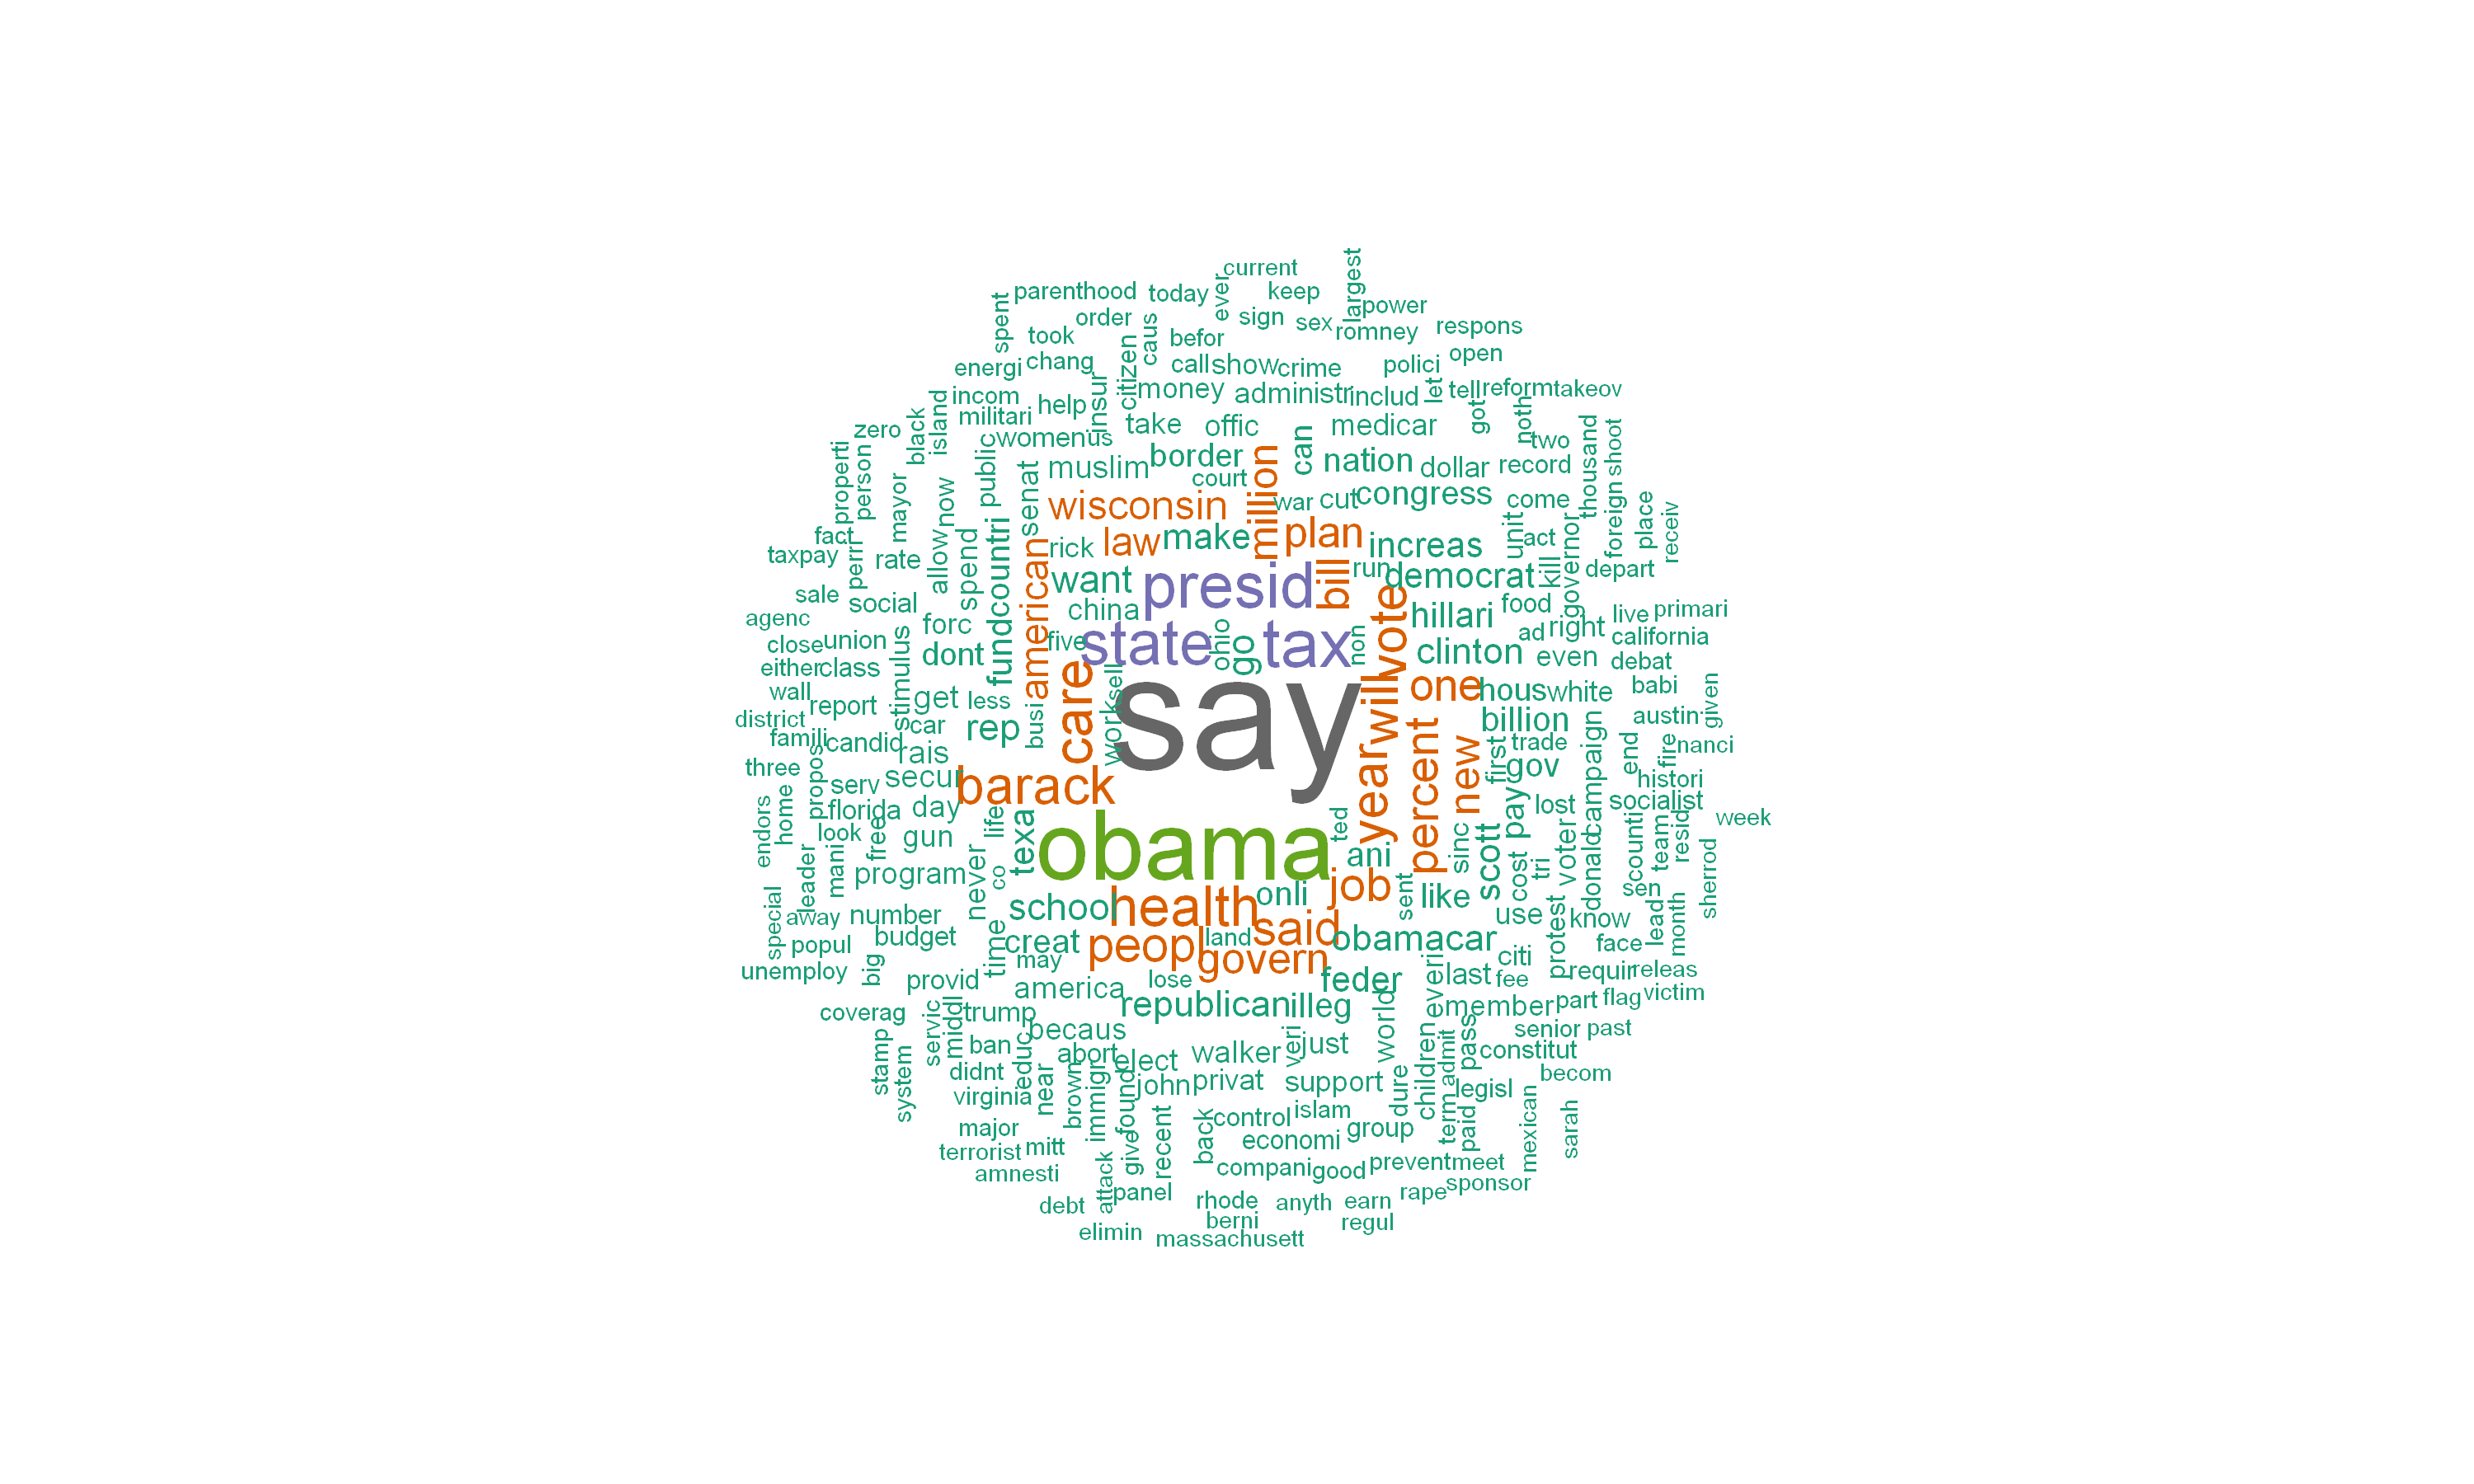

In [11]:
word_freqs <- dataset_1 %>% filter(Labels == 5) %>% pull(Text) %>% pre_process() %>% table() %>% data.frame

par(mar = rep(0, 4))

wordcloud(words = word_freqs$., freq = word_freqs$Freq, min.freq = 1,
          max.words=300, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Training , Test , Accuracy Functions

In [12]:
#Train function
trainNB <- function (Dataset,Classes,keep=1){
    
    dataset_vocabulary <<- pre_process(Dataset$Text,voc=TRUE,keep_features=keep)
    
    #Total number of sentences
    N_d <- nrow(Dataset)
    #Use group by Labels to count the cardinality of each class
    N_c <- Dataset %>% group_by(Labels) %>% count()
    #Calculate the log of the Prior
    log.prior <- log(N_c[,2]/N_d)
    #To return the likelihoods of every word in everyclass once the training is done we create this dataframe
    log.likelihood <- data.frame()
    
    for (class in Classes){
        #Bag all senteces into their labeled class
        bigdoc <- Dataset %>% filter(Labels == class) %>% pull(Text) %>% pre_process(keep_features=keep)
        #Count how many times the words appear in each class
        freqs <- table(c(bigdoc,dataset_vocabulary))-1 
        #This is the total number of words in the class
        N <- sum(freqs+1) #length(dataset_vocabulary)
        
        for (word in dataset_vocabulary){
            #For each word, calculate the log likelihood for in each class with Laplace smoothing.
            log.likelihood[class,word] <- log ((freqs[word]+1) / N)
       }
    }
    #After having calculated the likelihoods for each class for each word, we append it to a master-dataframe
    #which contains words in columns and the corresponding classes at rows.
    priors_log.likelihoods <- cbind(log.prior,log.likelihood)
    colnames(priors_log.likelihoods)[1] <- "priors"

    return(priors_log.likelihoods)
}

# Test function
TestNB <- function(test_data,Classes,posteriors){
    #For each sentece we are going to keep the prediction for 6 classes in this list
    predictions <- list()
    
    for (i in 1:nrow(test_data)){
        
        proccessed_sentence <- pre_process(test_data[[2]][i])
        
        sentence_predictions <- list()

        for (class in Classes){
        
            sum <- posteriors$priors[class]

            for (word in proccessed_sentence){
                
                if (word %in% dataset_vocabulary){
                    sum <- sum + posteriors[class,word]

                }
            }
        sentence_predictions <- append(sentence_predictions,sum)
        
        }
    predictions <- append(predictions, which(sentence_predictions==max(unlist(sentence_predictions))))
    }
    return(predictions)
}

#Accuracy function
accuracy <- function(preds,test_set){
    acc <- 0
    for (i in 1:length(preds)){

        if (preds[[i]] == test_set[[1]][i]){
            acc <- acc + 1
        }
    }
    return(acc/length(preds))}

In [13]:
Classes <- 1:6

#Train
priors_log.likelihoods <- trainNB(train_set,Classes)
row.names(priors_log.likelihoods) <- c("1.Barely-True","2.False","3.Half-True","4.Mostly-True","5.Not-Known","6.True")
priors_log.likelihoods

,priors,say,state,year,percent,tax,obama,presid,million,vote,...,zanesvill,zappala,zeldin,zell,zimmerman,zinn,zippo,zombi,zoo,zuckerberg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.Barely-True,-1.832246,-4.020110,-4.876081,-4.900774,-5.171927,-4.863960,-5.139666,-5.401237,-5.533296,-5.275467,...,-9.975948,-9.975948,-9.975948,-9.282801,-9.282801,-9.282801,-9.282801,-9.975948,-9.975948,-9.975948
2.False,-1.637417,-4.045402,-4.686281,-4.992655,-5.290874,-5.071127,-5.011703,-5.274067,-5.667110,-5.417168,...,-10.061559,-10.061559,-9.368412,-10.061559,-10.061559,-10.061559,-10.061559,-9.368412,-10.061559,-10.061559
3.Half-True,-1.573585,-4.143288,-4.677798,-4.724318,-4.733014,-4.984952,-5.142856,-5.379244,-5.217976,-5.644947,...,-10.166736,-9.473589,-10.166736,-10.166736,-10.166736,-10.166736,-10.166736,-10.166736,-10.166736,-10.166736
4.Mostly-True,-1.644978,-4.255982,-4.537900,-4.647099,-4.638589,-4.920637,-5.527709,-5.625084,-5.258233,-5.401940,...,-10.102420,-10.102420,-10.102420,-10.102420,-10.102420,-10.102420,-10.102420,-10.102420,-9.409273,-10.102420
5.Not-Known,-2.523107,-4.265622,-5.518385,-5.737074,-5.988388,-5.432863,-4.958769,-5.536403,-5.988388,-5.737074,...,-8.850589,-9.543736,-9.543736,-9.543736,-9.543736,-9.543736,-9.543736,-9.543736,-9.543736,-8.850589
6.True,-1.802191,-4.328624,-4.573351,-4.746623,-4.699120,-5.171188,-5.610270,-5.747471,-5.610270,-5.512631,...,-9.966979,-9.966979,-9.966979,-9.966979,-9.966979,-9.966979,-9.966979,-9.966979,-9.966979,-9.966979


In [14]:
#Test
predictions <- TestNB(test_set,Classes,priors_log.likelihoods)
#Calculate Accuracy
acc <- accuracy(predictions,test_set)
cat("The accuracy of the Naive Bayes Classifier is:",round(acc*100,2),"%")

The accuracy of the Naive Bayes Classifier is: 22.41 %

## Feature Selection Based on Standard Deviation of LogLikelihoods
We want to perform feature selection, that is to find a way to furthermore enhance the accuracy of the model by finding out which words help our model perform better or even drag down the model by making it perform worse.

The straight-forward way is to keep words that are highly frequent on the dataset. Common sense would say that these words make the most impact in the accuracy of the model since the whole model is based of frequencies. But there is a catch...

If there are words that appear frequent to all (or most) classes, this doesn't mean necesseraily that they help with the models accuracy and someone could argue quite the contrary. It could be that there is a perfect ratio of frequency and number of classes that contain the word. The ideal would be: highly frequent words that appear only in one or two classes.

In order to also explore this idea, we use as metric the loglikelihoog eachself. We are going to calculate the Standard Deviation of the loglikelihood for a all classes, for each word, and we will gradually disregard those with low std.

In [15]:
"new_row<-" <- function(x, value){x[nrow(x) + 1,] <- value; x}

feature_selection <- function(loglikelihood, threshold){

    z <- loglikelihood
    #get std for each word and append them in a list
    a <- list()
    for (i in 1:ncol(z)){
        a <- append(a,sd(z[,i]))}

    #append list to the dataframe
    new_row(z) <- a

    #compute threshold
    thresh <- qnorm(threshold,mean(unlist(a)),sd(unlist(a)))

    #mask for selecting the columns (words) with std above the threshold
    f <- list(TRUE)
    for (i in 2:ncol(z)){
        if (z[length(Classes)+1,i]>thresh){f<-append(f,TRUE)}
        else {f<-append(f,FALSE)}
    }

    thresholded_loglikelihood <- z[f==TRUE]
    voc <- colnames(thresholded_loglikelihood)
    return(thresholded_loglikelihood)
    }

In [16]:
accuracies <- c()
voc_num <- c()
steps <- seq(0,1,by=0.01)
for (i in steps){
    logs <- feature_selection(priors_log.likelihoods,i)
    dataset_vocabulary <- colnames(logs)
    predictions <- TestNB(test_set,Classes,logs)
    accuracies <- append(accuracies,accuracy(predictions,test_set))
    voc_num <- append(voc_num,length(dataset_vocabulary))
    }

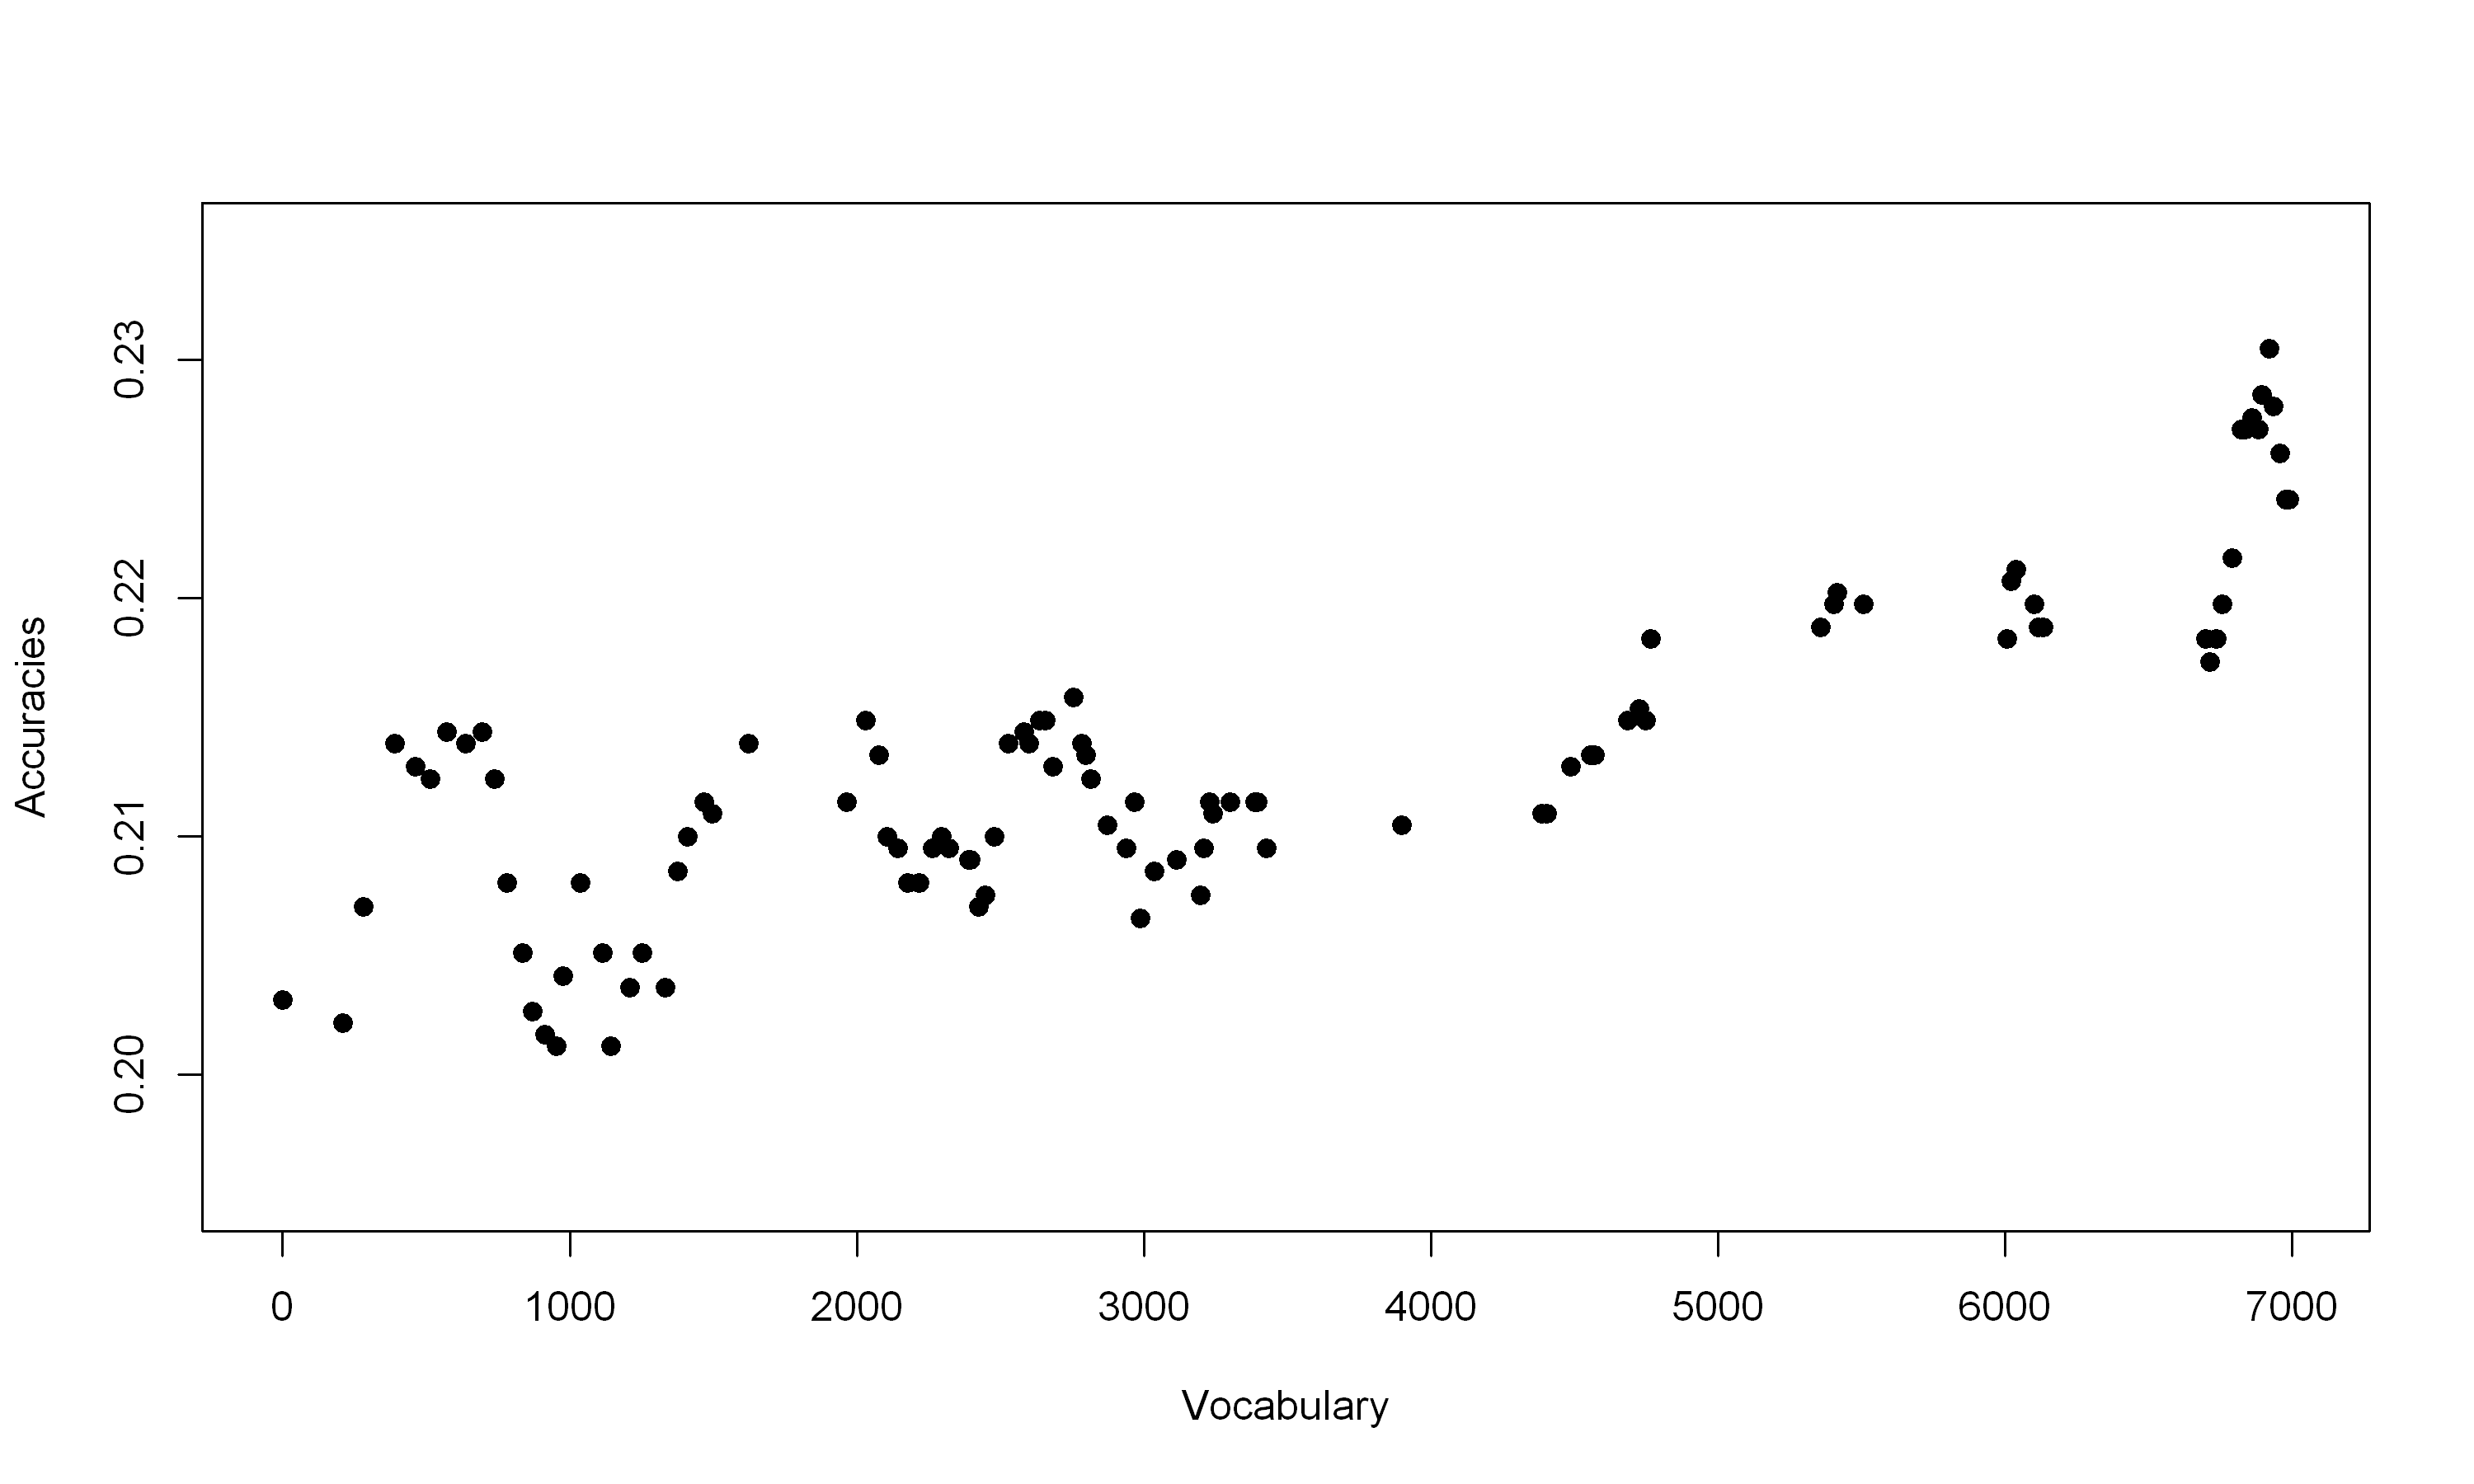

In [17]:
plot(voc_num,accuracies,pch=19,xlab="Vocabulary",ylab="Accuracies",ylim=c(0.195,0.235))

## Feature Selection Based on Frequency
A more rigorous feature selection method is frequency-based feature selection, that is, selecting the terms that are most common in the document. Frequency can be either defined as document frequency (the number of documents in the class c that contain the term $t$) or as collection frequency (the number of tokens of $t$ that occur in all documents). Our implementation will be document based.


Frequency-based feature selection selects some frequent terms that have no specific information about the class, for example, the days of the week (Monday, Tuesday, . . . ), which are frequent across classes in newswire text.
When many thousands of features are selected, then frequency-based feature selection often does well.
Thus, if somewhat suboptimal accuracy is acceptable, then frequency-based feature selection can be a good alternative to more complex methods.

In [18]:
Classes <- 1:6
keep <- seq(0.1,1,0.01)
accuracies <- c()
voc_num <- c()
for (k in keep){
    priors_log.likelihoods <- trainNB(train_set,Classes,keep=k)
    voc <- colnames(priors_log.likelihoods)
    voc_num <- append(voc_num,length(voc))
    #Test
    predictions <- TestNB(test_set,Classes,priors_log.likelihoods)
    #Calculate and keep Accuracy
    accuracies <- append(accuracies,accuracy(predictions,test_set))
}

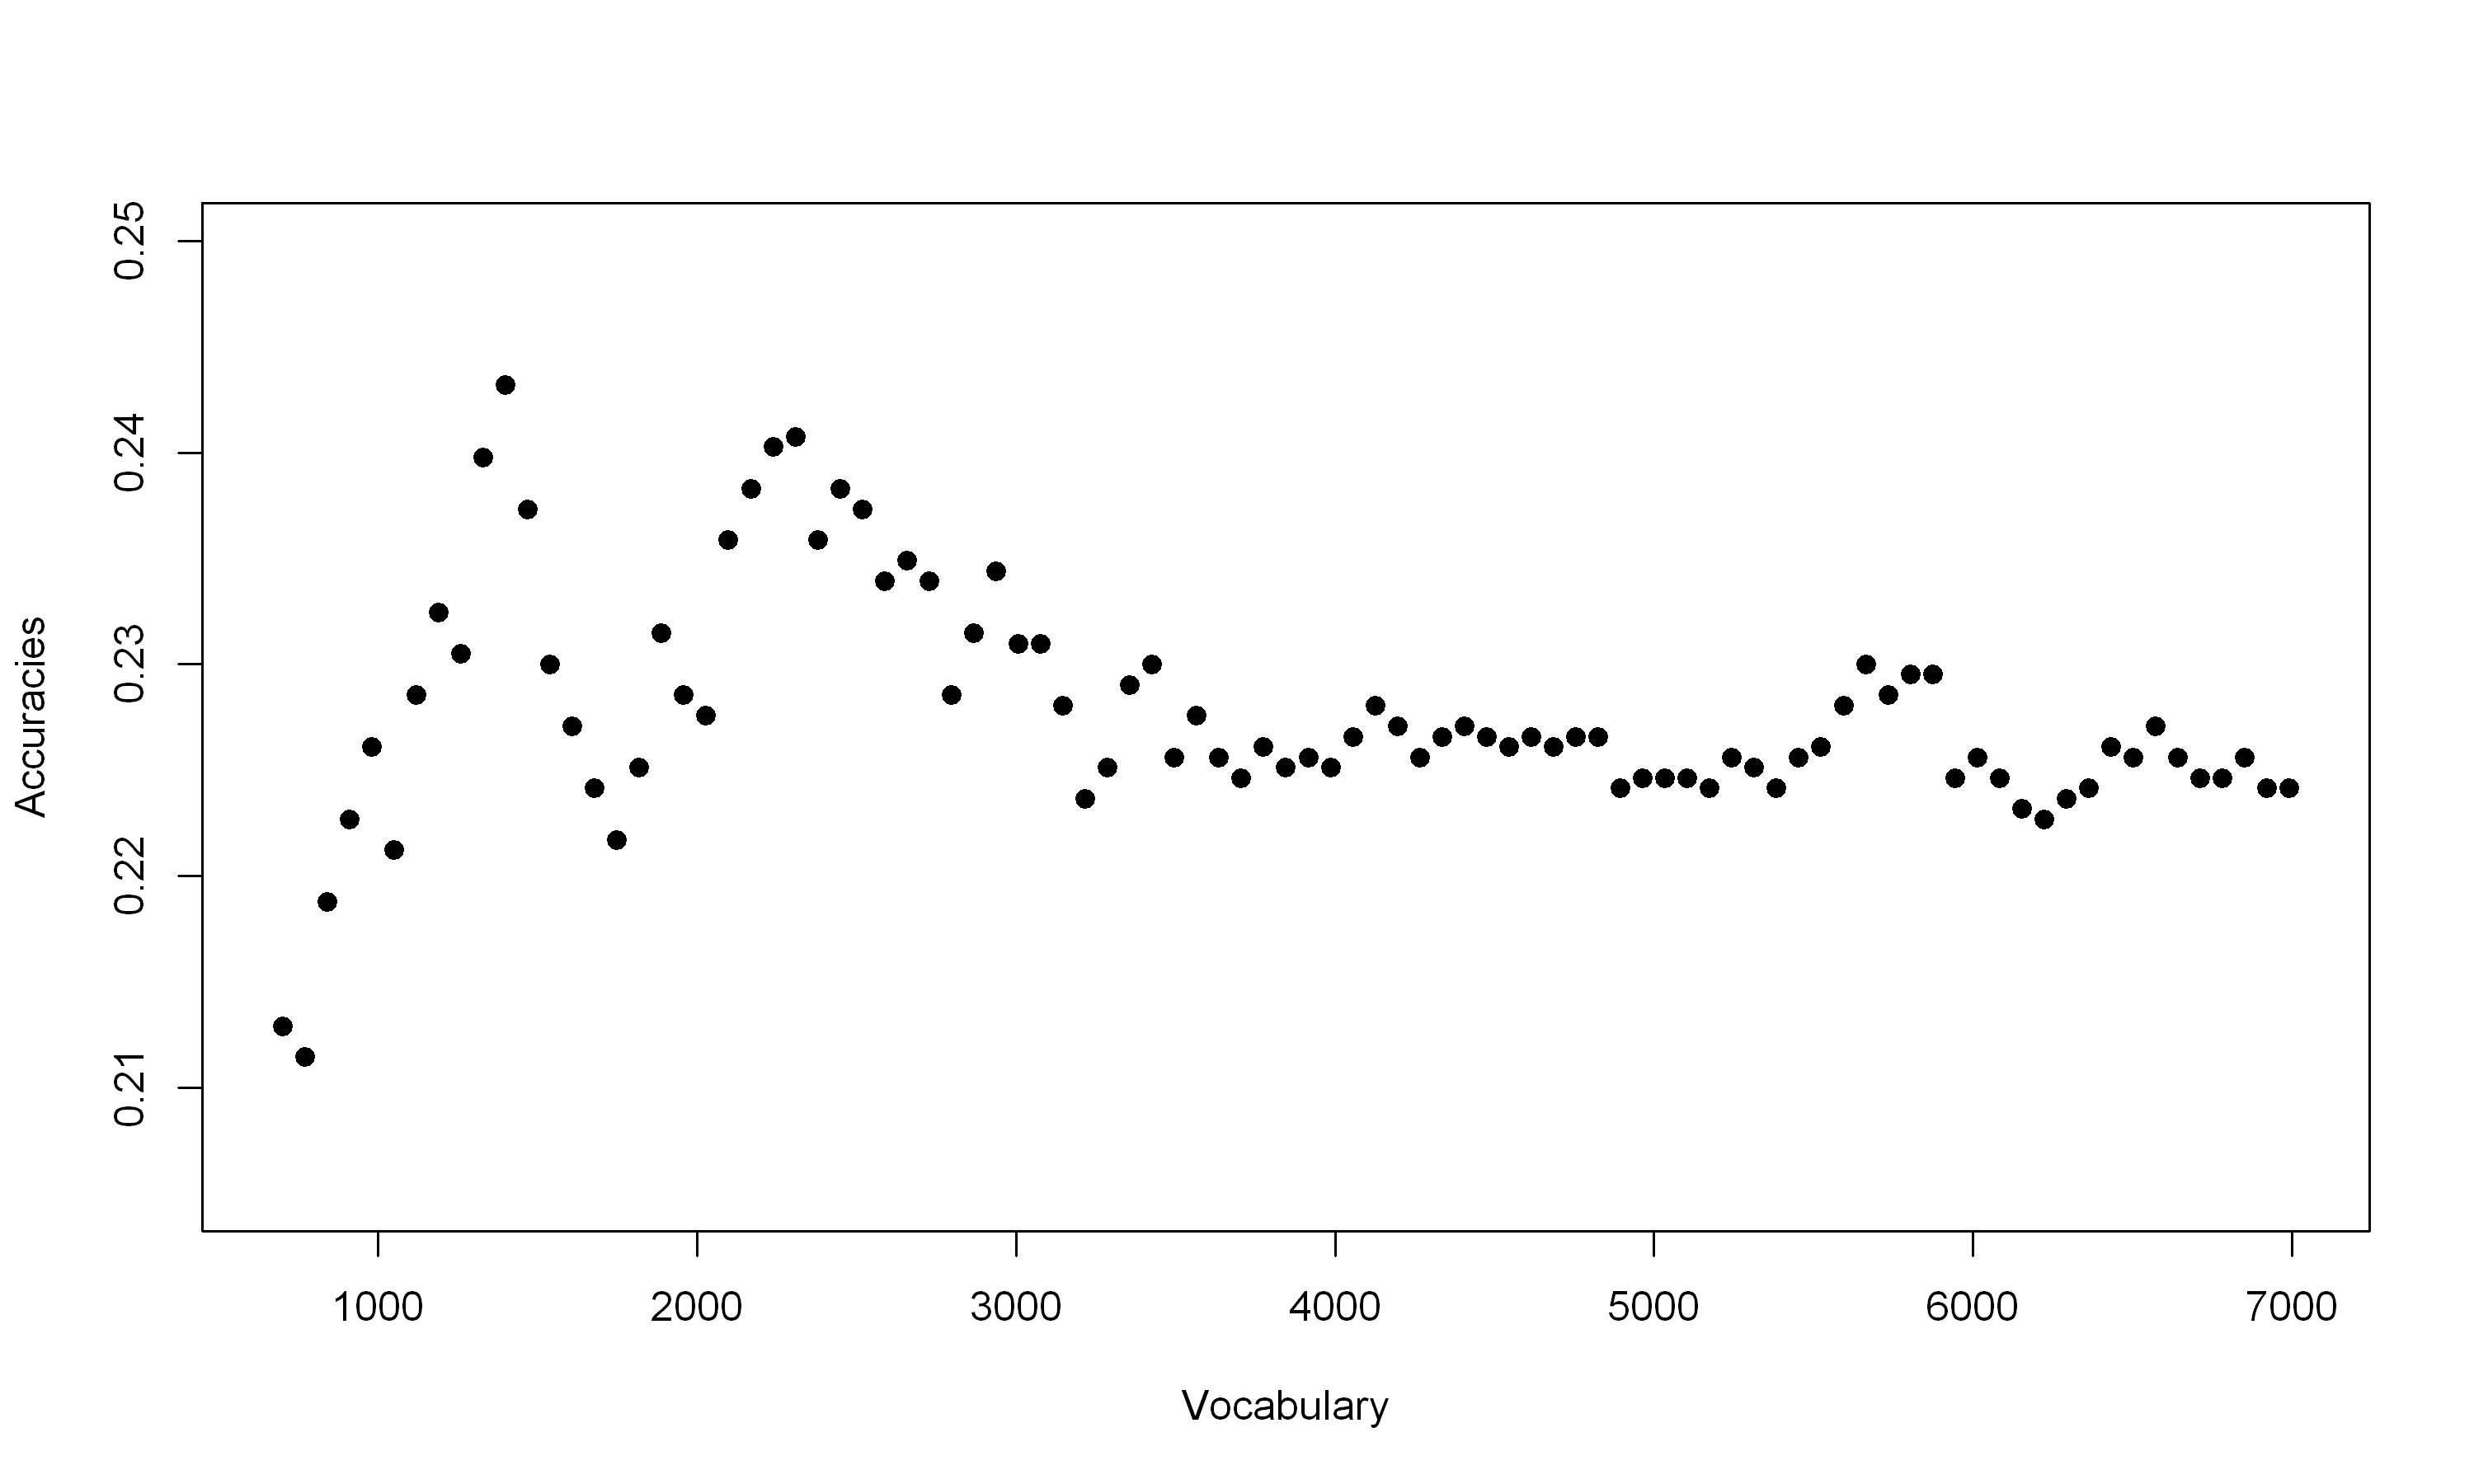

In [19]:
plot(voc_num,accuracies,pch=19,xlab="Vocabulary",ylab="Accuracies",ylim=c(0.205,0.25))

# Apply on Dataset with binary Labels

# Fake News
### Build a system to identify unreliable news articles
## Apply the developed methods and technique to a new dataset [3] which is characterized by only two labels:
### 1: unreliable , 0: reliable

train.csv: A full training dataset with the following attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

[3] https://www.kaggle.com/competitions/fake-news/data?select=train.csv

Dataset loading and processing to make it work with our previous functions and methods.

In [20]:
#Load the dataset and omit NAN rows
dataset_2 <- read_csv('dataset2/train.csv') %>% na.omit()
#Keep only the Text and the Labels
dataset_2 <- dataset_2[,4:5]
#Exchange Label and text columns to make the tibble compatable with the functions above
dataset_2 <- dataset_2[c("label","text")]
#Make the labels for 0-1 to 1-2 to make them compatable.
dataset_2$label <- dataset_2$label+1
#Rename the columns so they are compatible
colnames(dataset_2) <- c("Labels","Text")

Rows: 20800 Columns: 5
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): title, author, text
dbl (2): id, label

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
head(dataset_2)

Labels
1 2     
2 1     
3 2     
4 2     
5 2     
6 1     
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Train and test data splitting

In [22]:
#To calculate the 80% of the dataset (ceiling rounds to the upper limit)
N_train <- ceiling(0.8*nrow(dataset_2))

#Create train and test set
train_set <- dataset_2[1:N_train,]
test_set  <- dataset_2[N_train:nrow(dataset_2),]

#Print the actual legnths of the train and test sets
cat("Length of the train set:",nrow(train_set))
cat("\n")
cat("Length of the test set:",nrow(test_set))

Length of the train set: 16102
Length of the test set: 4026

Visualising the cardinality of the sets

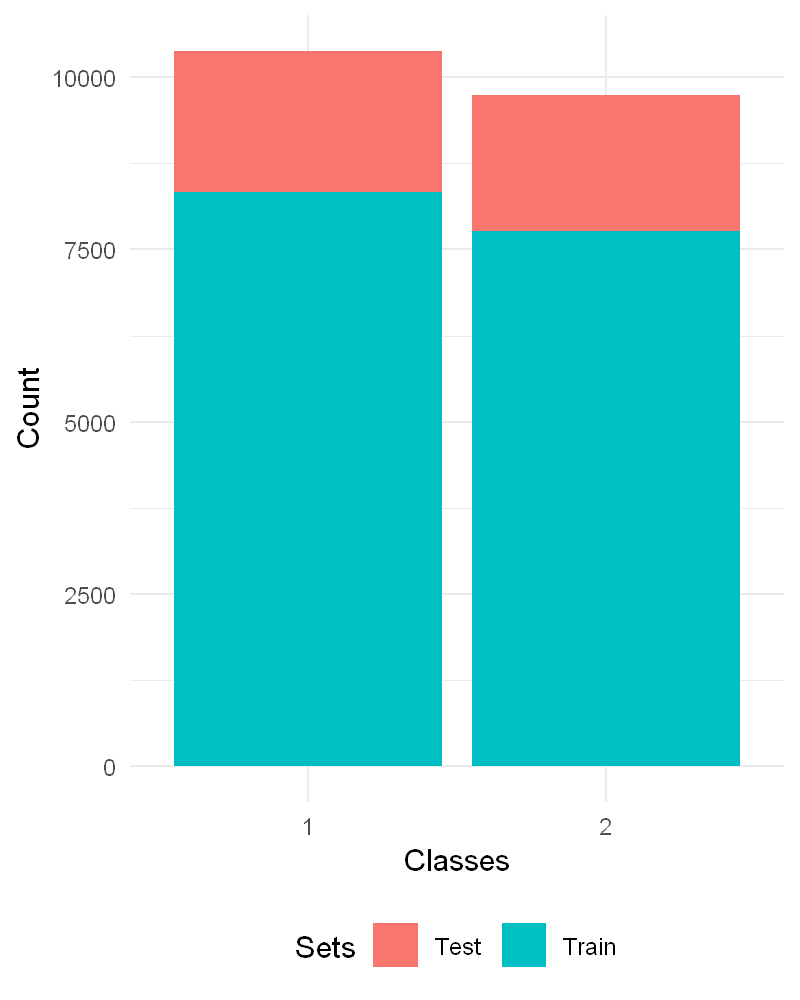

In [23]:
options(repr.plot.width=4, repr.plot.height=5, repr.plot.res=200)

class_freqs <- train_set[1] %>% table() %>% data.frame
class_counts_test_set <- test_set[1] %>% table() %>% data.frame
class_freqs <- cbind(class_freqs,class_counts_test_set$Freq)
names(class_freqs) <- c("Classes","Train","Test")
data <- class_freqs %>% gather(key = "Sets", value = "Value", -Classes)

ggplot(data, aes(x = Value, y = Classes, fill = Sets)) +
  geom_bar(stat = "identity") +
  labs(x = "Count", y = "Classes") +
  theme_minimal() +
  theme(legend.position = "bottom") +
  coord_flip()

Some nice wordclouds. This time the difference is obvious!

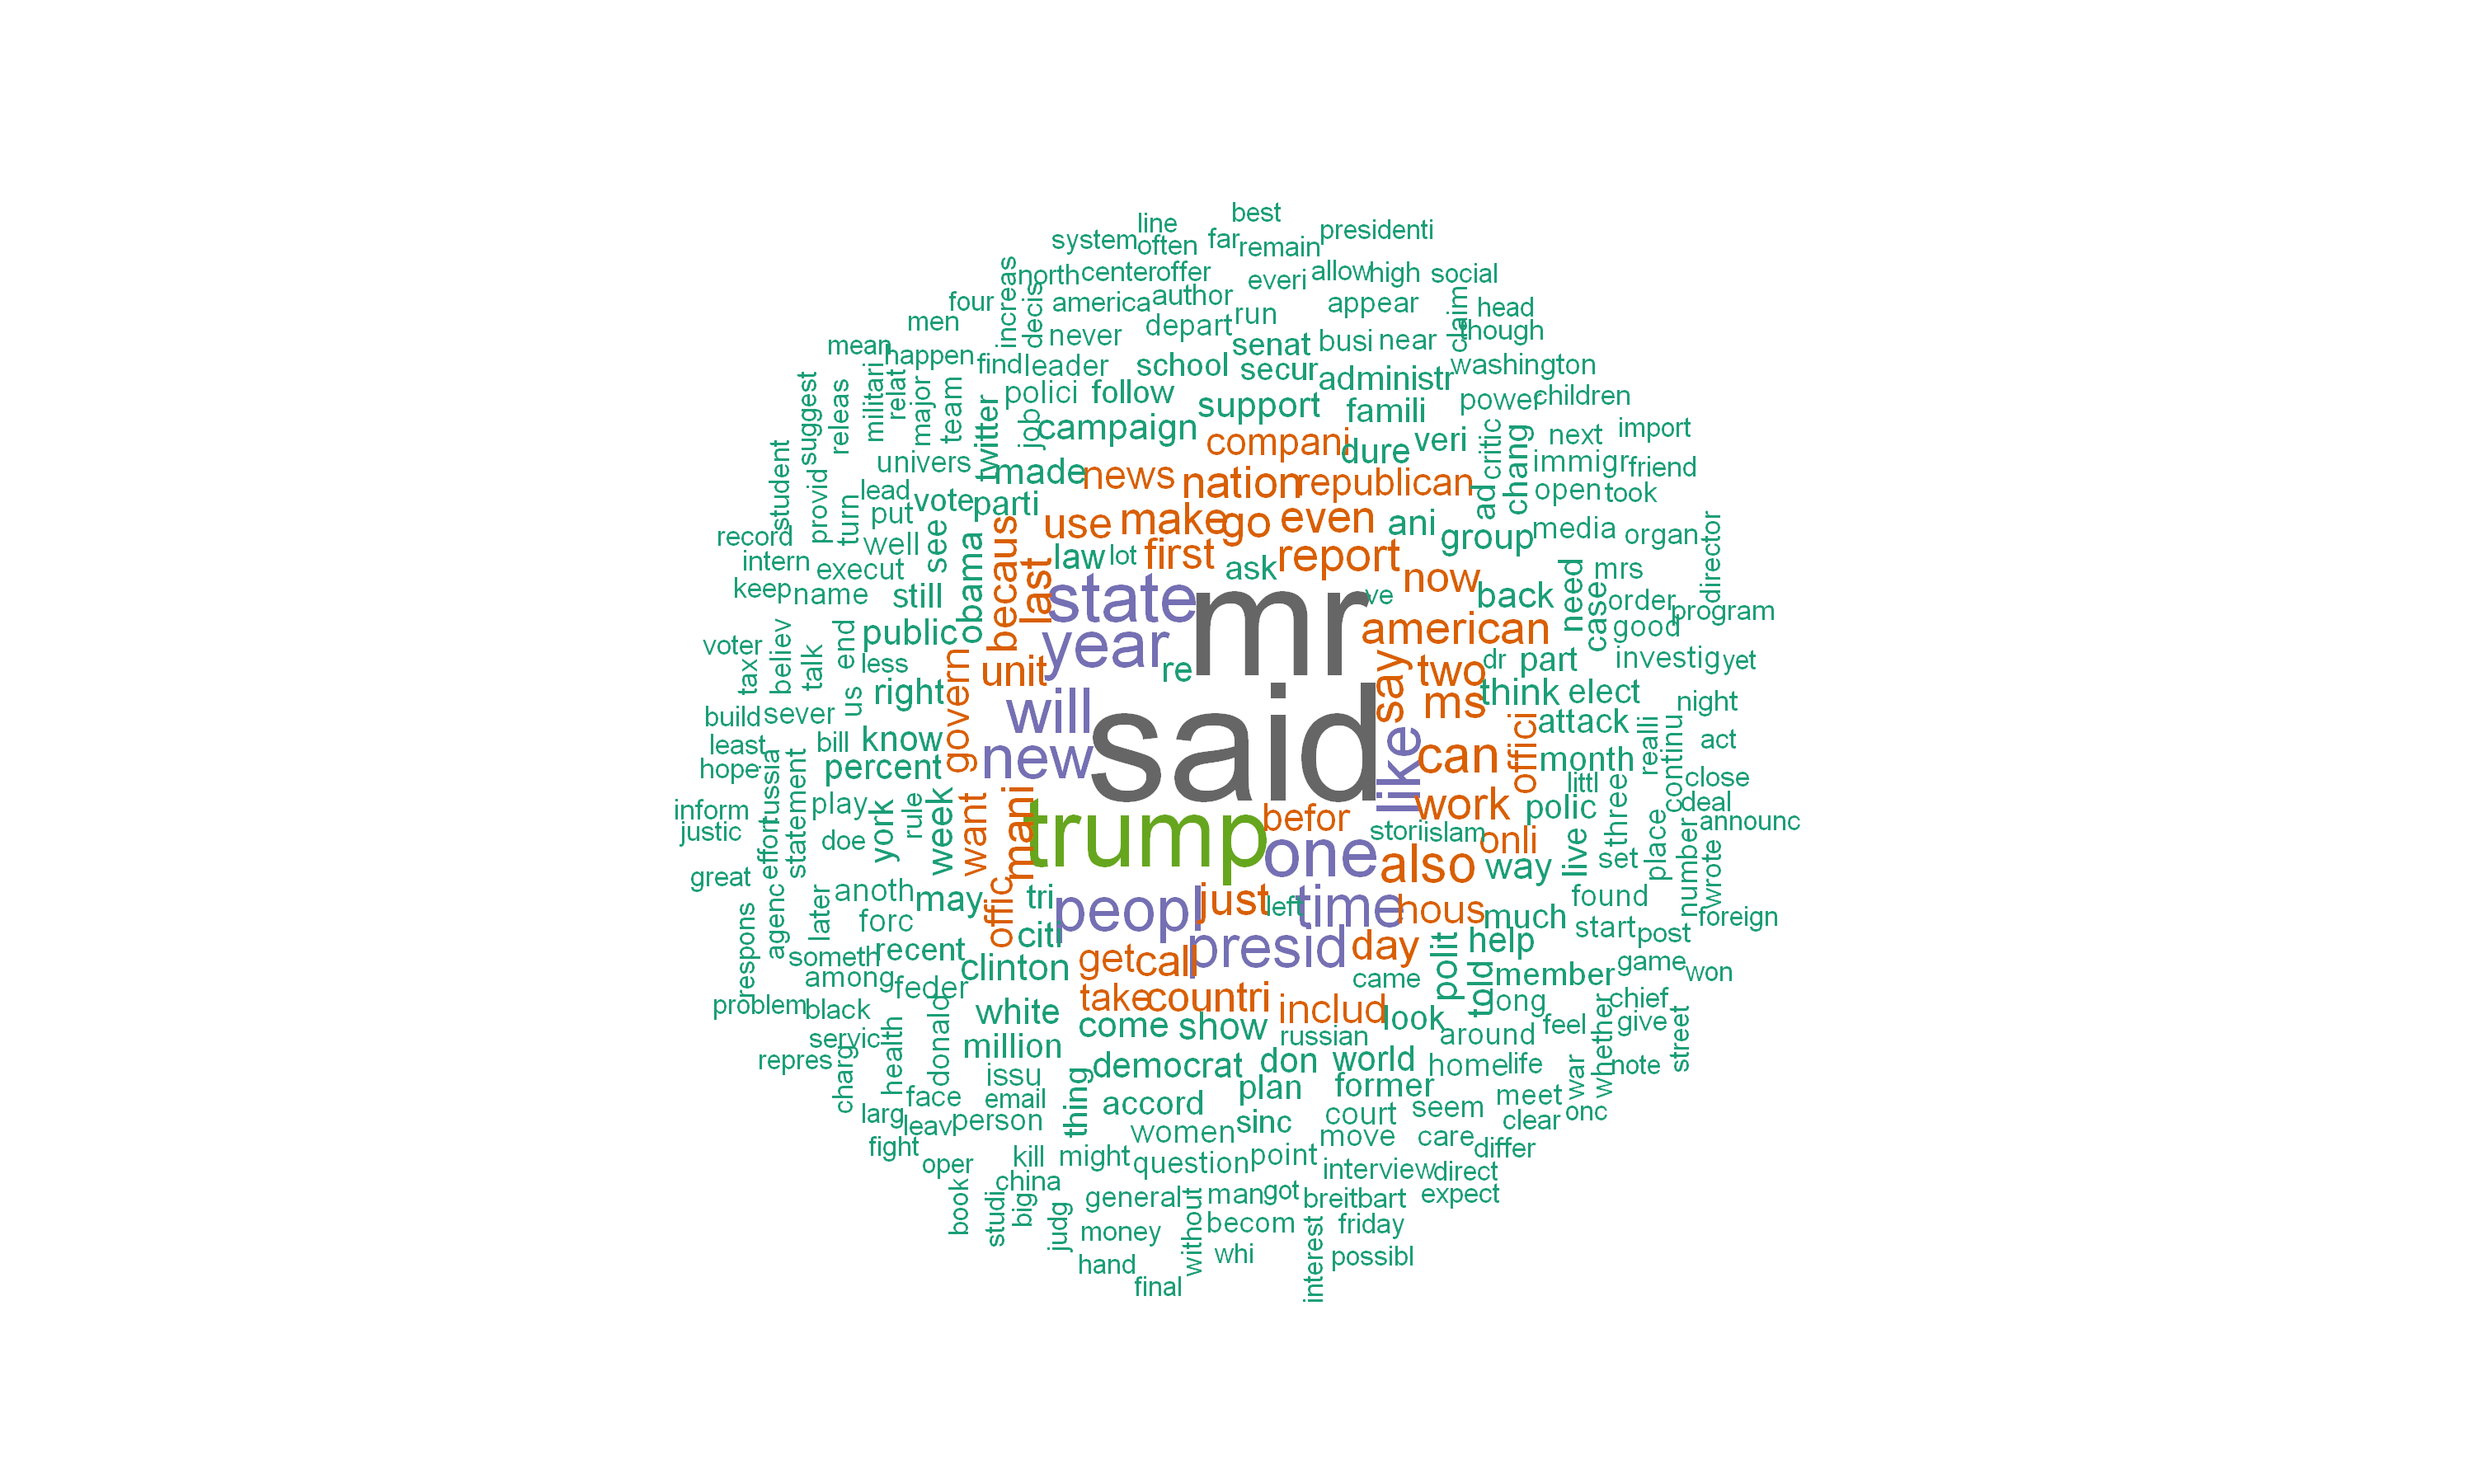

In [24]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res=300)

word_freqs <- dataset_2 %>% filter(Labels == 1) %>% pull(Text) %>% pre_process() %>% table() %>% data.frame

wordcloud(words = word_freqs$., freq = word_freqs$Freq, min.freq = 1,
          max.words=300, random.order=FALSE, rot.per=0.2, 
          colors=brewer.pal(8, "Dark2"))

Warning message in wordcloud(words = word_freqs$., freq = word_freqs$Freq, min.freq = 2, :
"develop could not be fit on page. It will not be plotted."


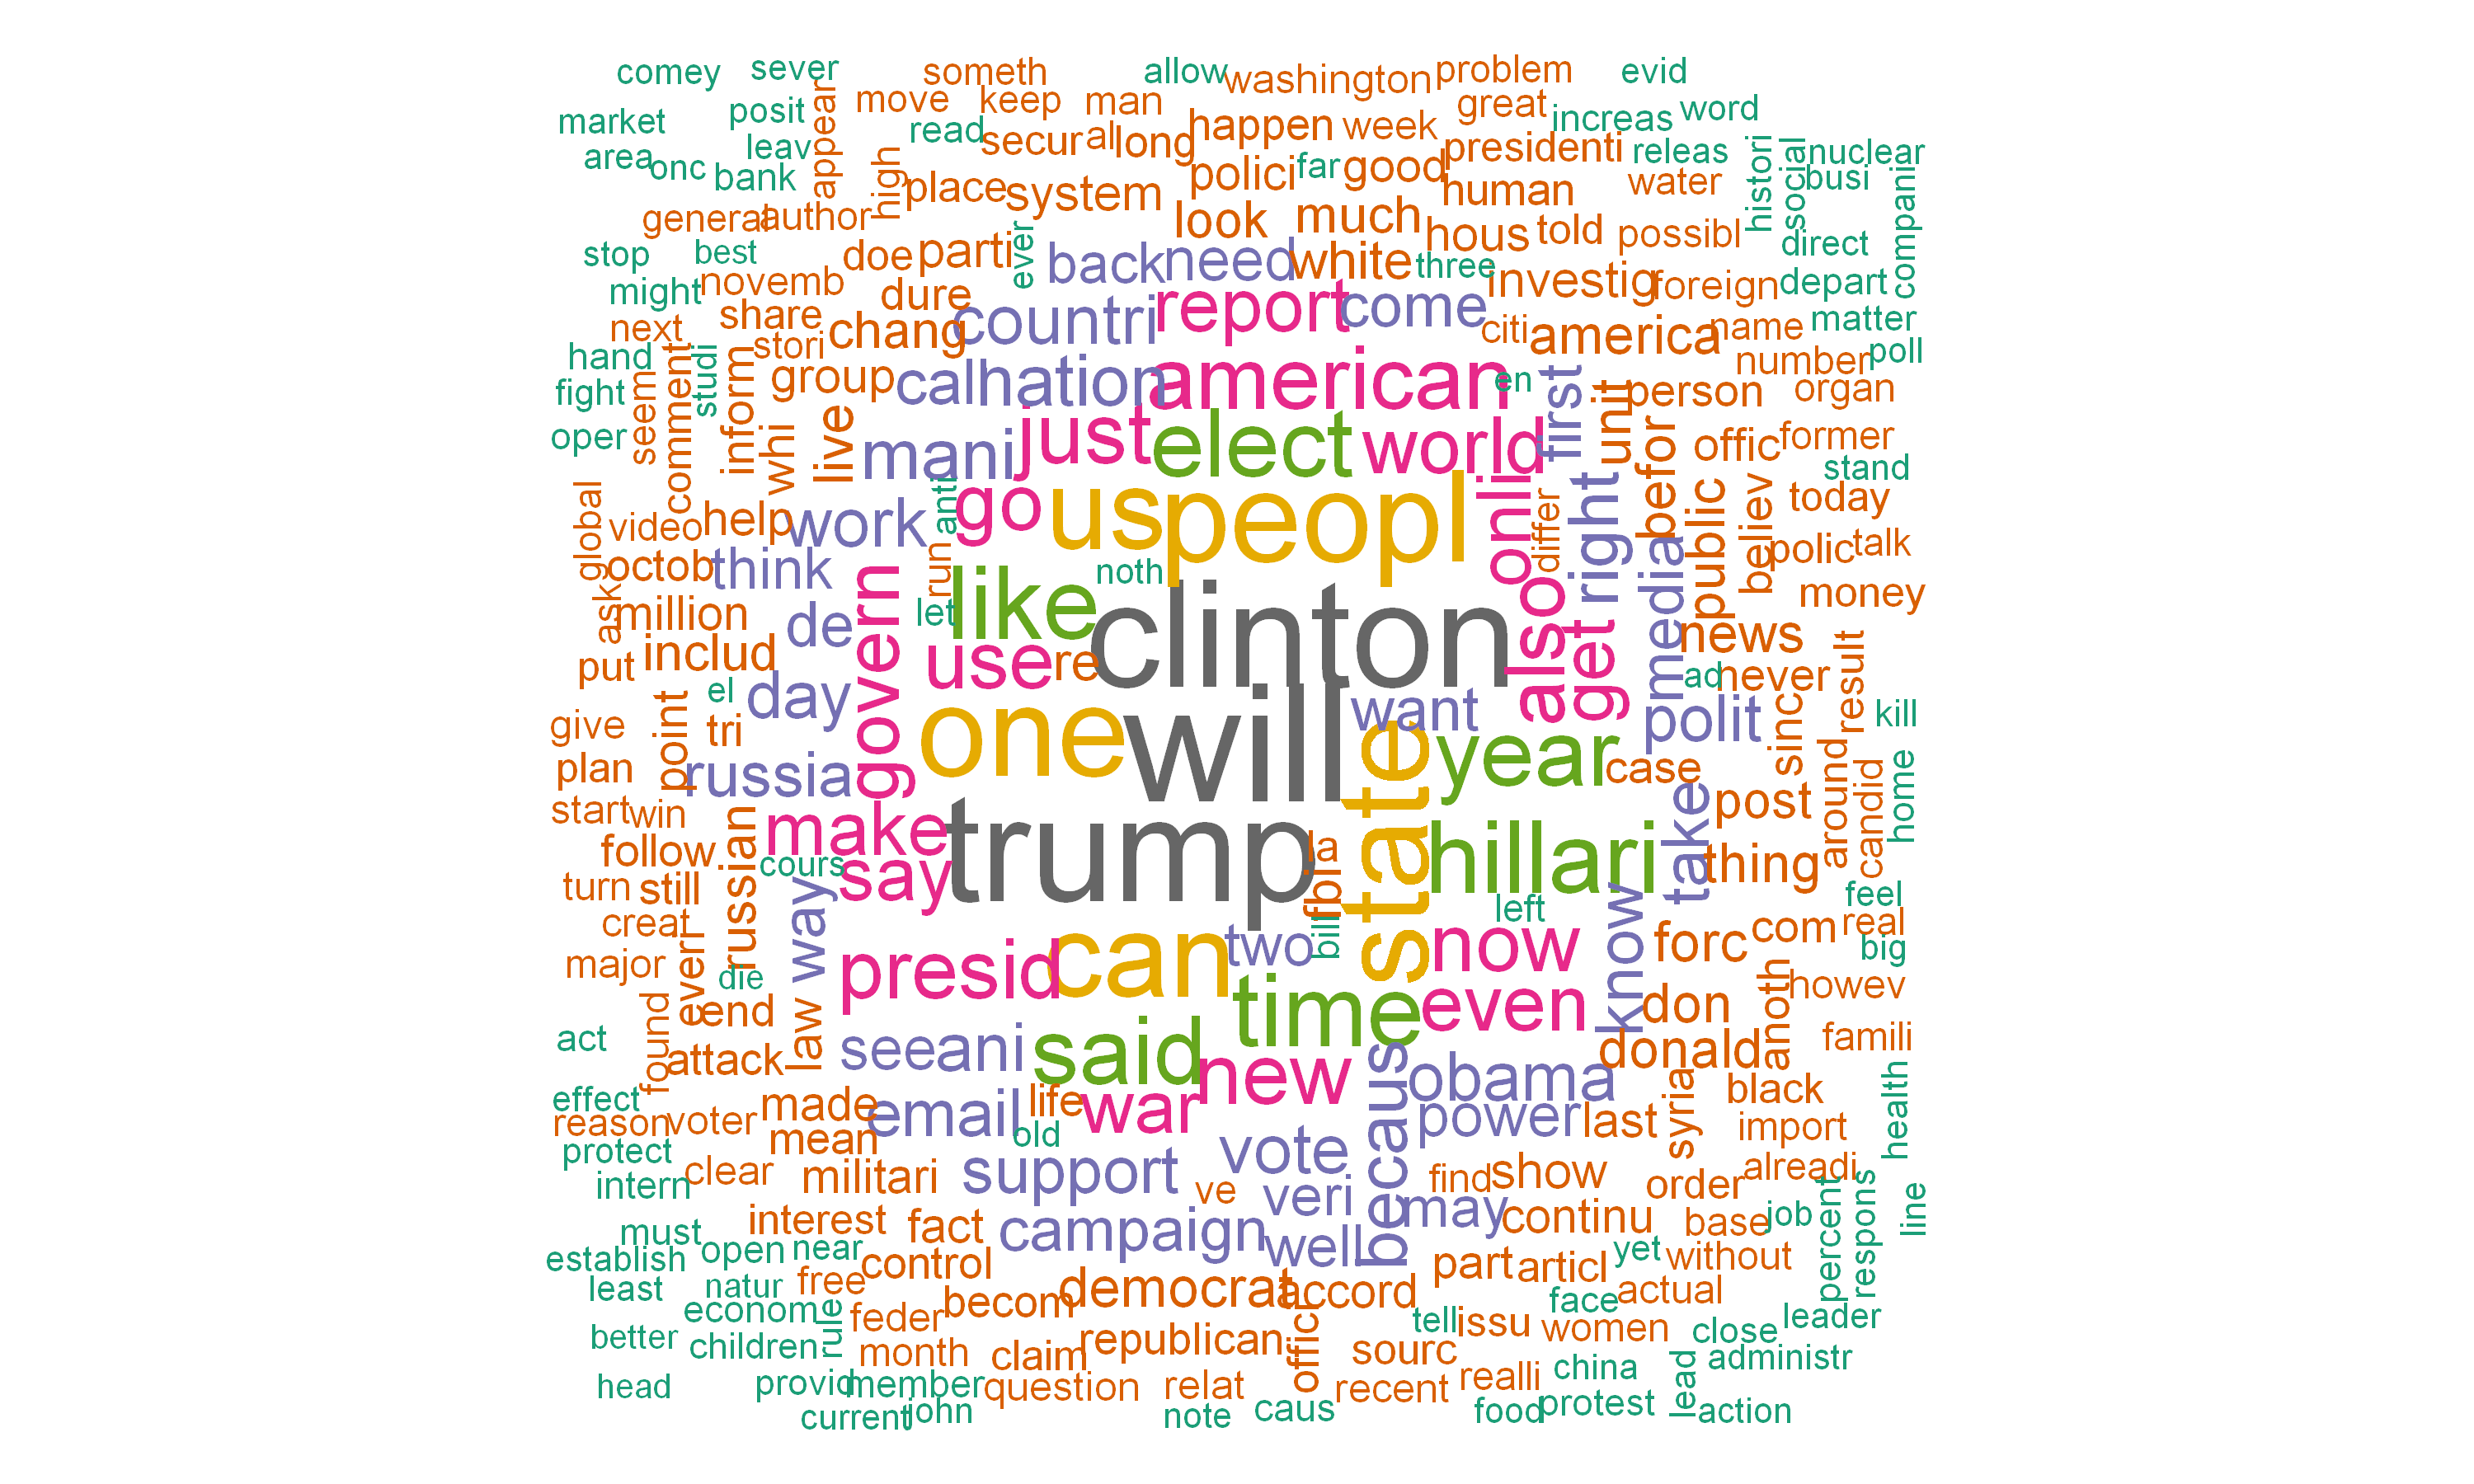

In [25]:
word_freqs <- dataset_2 %>% filter(Labels == 2) %>% pull(Text) %>% pre_process() %>% table() %>% data.frame

wordcloud(words = word_freqs$., freq = word_freqs$Freq, min.freq = 2,
          max.words=300, random.order=FALSE, rot.per=0.2, 
          colors=brewer.pal(8, "Dark2"))

## Training with the whole Train set
*Warning: running time aproximately 100 minutes*

In [26]:
Classes <- 1:2
#Train
priors_log.likelihoods <- trainNB(train_set,Classes)
row.names(priors_log.likelihoods) <- c("1.Reliable","2.Unreliable")
priors_log.likelihoods

,priors,said,mr,trump,will,state,one,peopl,year,like,...,zwyci,zxhnaxffg,zxycmwjdxj,zy,zyaira,zyaratgah,zylinderkopfdichtung,zytiga,zzwzqjo,zzzzs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.Reliable,-0.6586000,-4.328465,-4.386953,-4.971704,-5.537655,-5.374553,-5.398829,-5.551686,-5.480646,-5.598956,...,-15.24049,-15.24049,-15.24049,-15.24049,-14.54735,-14.54735,-15.24049,-14.54735,-15.24049,-14.54735
2.Unreliable,-0.7289308,-5.795580,-7.684203,-5.279961,-5.138590,-5.455203,-5.434153,-5.437081,-5.791705,-5.705260,...,-14.26484,-14.26484,-14.26484,-14.26484,-14.95799,-14.95799,-14.26484,-14.95799,-14.26484,-14.95799


Having a look at the log likelihoods of each class that we trained for each word.

In [27]:
priors_log.likelihoods

,priors,said,mr,trump,will,state,one,peopl,year,like,...,zwyci,zxhnaxffg,zxycmwjdxj,zy,zyaira,zyaratgah,zylinderkopfdichtung,zytiga,zzwzqjo,zzzzs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.Reliable,-0.6586000,-4.328465,-4.386953,-4.971704,-5.537655,-5.374553,-5.398829,-5.551686,-5.480646,-5.598956,...,-15.24049,-15.24049,-15.24049,-15.24049,-14.54735,-14.54735,-15.24049,-14.54735,-15.24049,-14.54735
2.Unreliable,-0.7289308,-5.795580,-7.684203,-5.279961,-5.138590,-5.455203,-5.434153,-5.437081,-5.791705,-5.705260,...,-14.26484,-14.26484,-14.26484,-14.26484,-14.95799,-14.95799,-14.26484,-14.95799,-14.26484,-14.95799


Implement the test set to make predictions and eventually to calculate the accuracy of the model.

In [28]:
#Test
dataset_vocabulary <- colnames(priors_log.likelihoods)
predictions <- TestNB(test_set,Classes,priors_log.likelihoods)
#Calculate Accuracy
acc <- accuracy(predictions,test_set)
cat("The accuracy of the Naive Bayes Classifier is:",round(acc*100,2),"%")

The accuracy of the Naive Bayes Classifier is: 89.57 %

## Using 10% of the most frequent words

In [29]:
#Train
priors_log.likelihoods_10p <- trainNB(train_set,Classes,keep=0.1)
row.names(priors_log.likelihoods_10p) <- c("1.Reliable","2.Unreliable")
#Test
predictions <- TestNB(test_set,Classes,priors_log.likelihoods_10p)
#Calculate Accuracy
acc <- accuracy(predictions,test_set)
cat("The accuracy of the Naive Bayes Classifier is:",round(acc*100,2),"%")

The accuracy of the Naive Bayes Classifier is: 88.1 %

In [30]:
cat("We used 10% of the normal length of the vocabulary which is:",ncol(priors_log.likelihoods_10p))

We used 10% of the normal length of the vocabulary which is: 9855

## Using 10% of the words with Likelihoods with the highest standard deviation 

In [31]:
#priors_log.likelihoods <- trainNB(train_set,Classes)
logs <- feature_selection(priors_log.likelihoods,0.9)
dataset_vocabulary <- colnames(logs)
predictions <- TestNB(test_set,Classes,logs)
acc <- accuracy(predictions,test_set)
cat("The accuracy of the Naive Bayes Classifier using the top 10% of high std loglikelihoods is:",round(acc*100,2),"%")

The accuracy of the Naive Bayes Classifier using the top 10% of high std loglikelihoods is: 88.65 %

In [32]:
cat("We used ",ncol(logs)," unique words as vocabulary")

We used  9651  unique words as vocabulary

# Conclusions

After applying the Naive Bayes Classifier the first of our conclusions is that this kind of models are data hungry. The first model was underperforming obviously because it didn't have enough text. 

Another factor is obviously the unbinguity of the labeling on the first dataset. It is much easier to have a binary target set than a multiclass labeling system.

*total running time ~ 110minutes*